In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import c
from scipy.constants import pi
from scipy.constants import Boltzmann, degree


R_E = 6371e3  
h_s = 500e3  #satellite altitude in meters
frequency = 26e9  # 26 GHz

The aim of this project is to analyze
the downlink communication of a next-generation LEO satellite connected to a ground station at 26 GHz.

scenario: TX is LEO sattellite, frequency 26GHz, bandwidth 40MHz
E elevation angle and d (TX-RX distance) always changing,
d=sqrt( (R_E + h_s)^2 - R_E^2 cos^2E) - R_E*sinE
where R_E = 6371 km, h_s=500 km


part1: analyse the evolution of the following metrics as a function of sattellite elevation angle:
- free space path loss [dB]
- received power [dBm]
- SNR [dB]
- channel capacity [bit/s]

---
approach:
lets tackle the first part of the project first (Analyse the evolution of the following metrics as a function of the satellite elevation angle: free space path loss [dB], then received power [dBm], then SNR [dB], then channel capacity [bit/s]. the formula for free space path loss im assuming it is the one youve given me in the code above, and the distance and elevation angle are always changing as the satellite is orbiting, with the formula given by d=sqrt( (R_E + h_s)^2 - R_E^2 cos^2(E)) - R_E*sin(E), R_E = 6371 km, h_s=500 km.

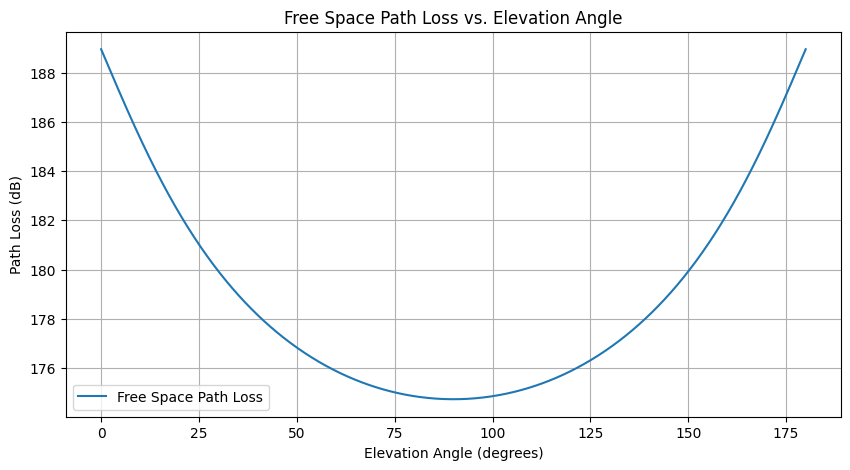

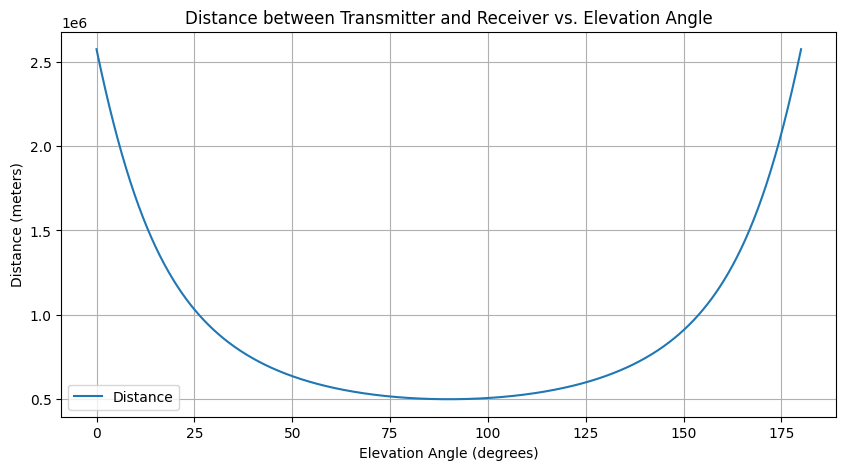

In [17]:
def satellite_distance(elevation_angle_deg):
    # convert elevation angle from degrees to radians
    E = np.radians(elevation_angle_deg)
    # distance d using the provided formula
    d = np.sqrt((R_E + h_s)**2 - R_E**2 * np.cos(E)**2) - R_E * np.sin(E)
    return d

def free_space_path_loss(d, f=frequency):
    # calculate the free space path loss in dB
    wavelength = c / f
    path_loss = 20 * np.log10((4 * pi * d / wavelength))
    return path_loss


elevation_angles = np.linspace(0, 180, 1000)
distances = [satellite_distance(e) for e in elevation_angles]
path_losses = [free_space_path_loss(d) for d in distances]


plt.figure(figsize=(10, 5))
plt.plot(elevation_angles, path_losses, label='Free Space Path Loss')
plt.xlabel('Elevation Angle (degrees)')
plt.ylabel('Path Loss (dB)')
plt.title('Free Space Path Loss vs. Elevation Angle')
plt.grid(True)
plt.legend()
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(elevation_angles, distances, label='Distance')
plt.xlabel('Elevation Angle (degrees)')
plt.ylabel('Distance (meters)')
plt.title('Distance between Transmitter and Receiver vs. Elevation Angle')
plt.grid(True)
plt.legend()
plt.show()

the path loss is indeed minimal when the satellite is directly overhead, at the zenith position, which is 90 degrees of elevation. At this point, the distance between the satellite and the receiver is the shortest, resulting in the least path loss. The path loss increases as the satellite moves toward the horizon (0 degrees and 180 degrees in the symmetry you've added). This is because the signal has to travel a greater distance, which introduces more loss.
The free space path loss is a measure of the reduction in power of an electromagnetic wave as it propagates through free space. It does not take into account other potential losses such as atmospheric absorption, multipath fading, etc. The formula for free space path loss does indeed calculate a different value for each point along the satellite's path because it depends on the instantaneous distance  d between the transmitter (Tx) and receiver (Rx), which changes as the satellite moves along its orbit.
This model assumes an idealized condition of free space, so it's a starting point for understanding the basic limitations on signal strength due to distance alone. Further details, such as atmospheric effects, would be additional factors that can be layered onto this base calculation for a more comprehensive analysis.

The calculated distance between the satellite and the receiver at the edge of the line of sight (with an elevation angle of 0 or 180 degrees) is approximately 2573 km. This confirms that when the satellite is at the horizon from the perspective of the ground station, the distance is indeed much greater than the altitude at which the satellite orbits Earth, which is consistent with the expected geometry of satellite communication

moving on to the next part, calculating the received powert = tx power - path loss.
the tx power can be derived from EIRP but need to convert from Watt to dBW
EIRP (W) = 10 ^ {EIRP (dbW)/10}
and 
P_{rx} (dBm)=EIRP (dBW)−Path Loss (dB)+30

for the momentm gain was assumed 1 (isotropic antenna)



[-118.95648606011292, -118.88885605837305, -118.82123082499578, -118.75361512569577, -118.68601372089597, -118.61843136309255, -118.55087279423171, -118.48334274310389, -118.41584592275808, -118.3483870279413, -118.28097073256646, -118.21360168721282, -118.14628451666263, -118.07902381747766, -118.01182415561925, -117.94469006411472, -117.87762604077412, -117.81063654595994, -117.74372600041289, -117.67689878313647, -117.61015922934277, -117.54351162846248, -117.47696022222075, -117.41050920278141, -117.34416271096103, -117.27792483451495, -117.21179960649692, -117.1457910036927, -117.07990294513019, -117.0141392906657, -116.9485038396482, -116.88300032966154, -116.81763243534505, -116.752403767293, -116.68731787103292, -116.62237822608245, -116.55758824508479, -116.49295127302184, -116.42847058650514, -116.3641493931429, -116.29999083098326, -116.23599796803222, -116.1721738018449, -116.10852125918956, -116.04504319578226, -115.98174239609148, -115.91862157321029, -115.8556833687951, 

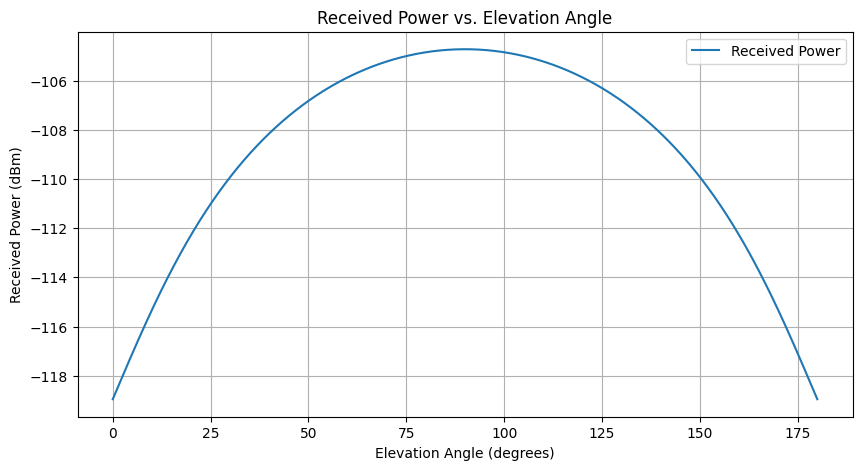

In [18]:
# Given EIRP
EIRP_dBW = 40  

def dBW_to_Watts(dBW):
    return 10**(dBW / 10)


def received_power_dBm(EIRP_dBW, path_loss_dB):
    # convert EIRP from dBW to dBm (1 W = 30 dBm)
    EIRP_dBm = EIRP_dBW + 30
    # subtract the path loss to get the received power
    P_rx_dBm = EIRP_dBm - path_loss_dB
    return P_rx_dBm

# calculate received power in dBm for each path loss value
received_powers_dBm = [received_power_dBm(EIRP_dBW, pl) for pl in path_losses]
print(received_powers_dBm)

plt.figure(figsize=(10, 5))
plt.plot(elevation_angles, received_powers_dBm, label='Received Power')
plt.xlabel('Elevation Angle (degrees)')
plt.ylabel('Received Power (dBm)')
plt.title('Received Power vs. Elevation Angle')
plt.grid(True)
plt.legend()
plt.show()


power is highest when satellite is directly overhead and decereases as elevation angle moves away from zenith (as expected). values are negative because we express it in dBm, they simply indicate the power received is less than 1mW. recieved power is calculated by subtracting path loss from EIRP (converted to dBm)


calculating SNR:  in my lecture notes its mentioned that we have two contributions for noise, thermal noise N=k_B T B where kB is boltzmann constant, T temperature (K) and B bandwidth, and the other noise contribution is the reciever noise (introduced by receiver electronics ) F_dB, without any formula given. SNR is expressed as 10 log_{10} (P_{RX}/N}



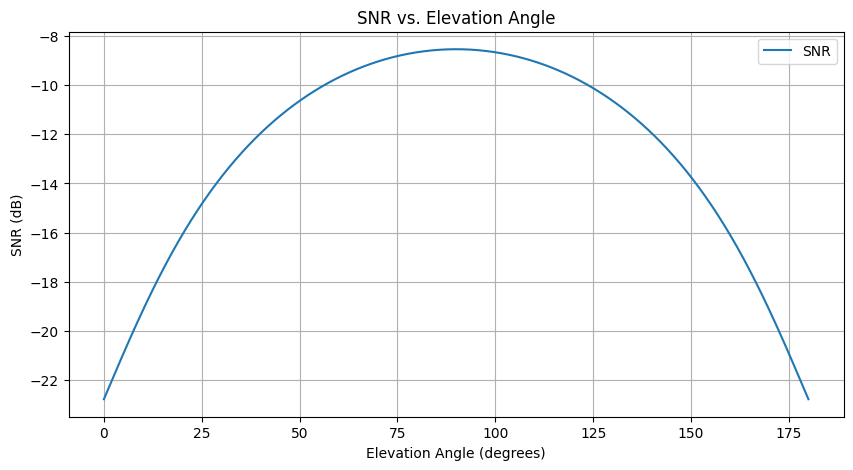

In [19]:
k_B = Boltzmann  # J/K
system_temperature_K = 275  # system temperature in Kelvin (assumed to be 275K as given)
bandwidth_Hz = 40e6  # 40 MHz
noise_figure_dB = 2  # noise figure in dB (given) ???
noise_figure_linear = 10 ** (noise_figure_dB / 10)

def thermal_noise(T, B):
    return k_B * T * B

thermal_noise_power = thermal_noise(system_temperature_K, bandwidth_Hz)
total_noise_power = thermal_noise_power * noise_figure_linear

def dBm_to_Watts(dBm):
    return 10 ** ((dBm - 30) / 10)

def calculate_SNR_dB(received_power_dBm, total_noise_power_W):
    P_RX_W = dBm_to_Watts(received_power_dBm)
    SNR_linear = P_RX_W / total_noise_power_W
    SNR_dB = 10 * np.log10(SNR_linear)
    return SNR_dB

SNRs_dB = [calculate_SNR_dB(P_rx, total_noise_power) for P_rx in received_powers_dBm]
SNRs_dB_no_rain=SNRs_dB

plt.figure(figsize=(10, 5))
plt.plot(elevation_angles, SNRs_dB, label='SNR')
plt.xlabel('Elevation Angle (degrees)')
plt.ylabel('SNR (dB)')
plt.title('SNR vs. Elevation Angle')
plt.grid(True)
plt.legend()
plt.show()

as for the SNR being 'spikey' or variable, in real-world scenarios, the SNR would indeed fluctuate due to various factors like atmospheric conditions, multipath interference, and system noise. However, in a theoretical model like this, which only accounts for free space path loss and does not include other effects such as atmospheric attenuation or multipath fading, the SNR curve will be smooth as it is purely a function of the geometric path loss with respect to the satellite's elevation angle.
This idealized model doesn't include random variations, so it won't show spikes or dips that would represent momentary changes in SNR. Such variations would be modeled with a more complex simulation that includes stochastic processes representing noise and interference, and possibly also taking into account the specific modulation and coding scheme used which affects the minimum SNR required for a reliable link.

An SNR of -10 dB means the power of the signal is 1/10th of the power of the noise.
An SNR of -12 dB means the power of the signal is about 1/16th of the power of the noise

noise is stronger thatn power of transmitted signal and this amy be beacuse we use isotropic antenna instead of directing a beam

 The calculated path loss is extremely high, which seems to be the primary factor contributing to such a low SNR, and EIRP is nt sufficient to overcome the path loss at this freq and distance

lets move on to calculating channel capacity and total transmitted data during one pass

so we start from an array of SNRs of size 500. these are values of SNRs computed at different elevation angles E (therefore at different distances between tx and rx), between 0 and 180 degrees, where 0 is horizon, 90 is when the satellite is above the receiver, and 180 is the horizon again. SNRs for angles of E between 180 and 360 should be -infty i guess (simply not valid, since theres no LOS therefore no communication). we can define channel capacity at each instance of the SNR, so we compute 500 channel capacities. then, to approximate the integral which gives us the total transmitted data, we multiply these capacities at specific time instances with a small interval of time \delta t_n corresponding to the time the satellite spends at a particular elevation angle (and thus is responsible for a specific SNR). this time is calculated based on the angular speed of the satellite (we want to determine how much time the satellite is in LOS), divided by the intervals of time we used (500)


1000
1000


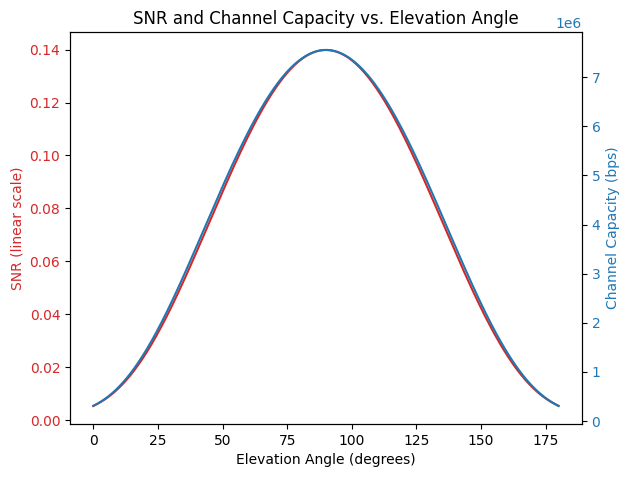

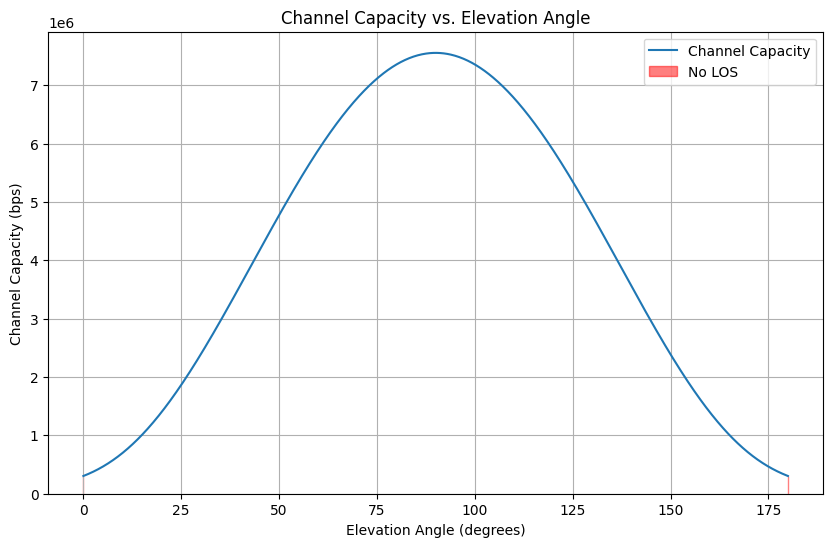

1000
11.542190065166297
174.09685192706462 MB


In [20]:

R_E = 6371e3  
h_s = 500e3   # satellite altitude [meters]
T_rev = 5668  # satellite revolution period [seconds]
B = 40e6     


def satellite_distance(elevation_angle_deg):
    E = np.radians(elevation_angle_deg)
    d = np.sqrt((R_E + h_s)**2 - (R_E * np.cos(E))**2) - R_E * np.sin(E)
    return d

def snr_db_to_linear(snr_db):
    snr_db = np.array(snr_db)
    return 10 ** (snr_db / 10)

# given array of SNRs in dB for elevation angles from 0 to 180 degrees

SNRs_linear = snr_db_to_linear(SNRs_dB)
channel_capacities = B * np.log2(1 + SNRs_linear)

print(len(channel_capacities))
print(len(elevation_angles))

#plot the SNRs and channel capacity at each elevation angle
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Elevation Angle (degrees)')
ax1.set_ylabel('SNR (linear scale)', color=color)
ax1.plot(elevation_angles, SNRs_linear, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Channel Capacity (bps)', color=color)
ax2.plot(elevation_angles, channel_capacities, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('SNR and Channel Capacity vs. Elevation Angle')
plt.show()



plt.figure(figsize=(10, 6))
plt.plot(elevation_angles, channel_capacities, label='Channel Capacity')
plt.xlabel('Elevation Angle (degrees)')
plt.ylabel('Channel Capacity (bps)')
plt.title('Channel Capacity vs. Elevation Angle')
plt.grid(True)
plt.ylim(bottom=0)  # Ensure that the y-axis starts at 0
plt.axhline(0, color='black', linewidth=0.5)  # Draw a line at y=0 for reference
plt.fill_between(elevation_angles, channel_capacities, where=(elevation_angles<=0) | (elevation_angles>=180), color='red', alpha=0.5, label='No LOS')
plt.legend()
plt.show()

# Calculate distances and alpha for each elevation angle in LOS
print(len(SNRs_dB))
elevation_angles = np.linspace(0, 180, len(SNRs_dB))  # replace len(SNRs_dB) with actual number of SNRs if different
distances = np.array([satellite_distance(e) for e in elevation_angles])
alphas = np.arcsin(distances / (R_E + h_s) * np.cos(np.radians(elevation_angles)))
#plt.plot(alphas)
# Calculate Δα_n and Δt_n
delta_alphas = np.abs(np.diff(alphas))
delta_tn = (T_rev * delta_alphas) / (2 * np.pi)

#for sanity check, compute LOS time
los_time_segments = delta_tn[elevation_angles[:-1] <= 180]
total_los_time = np.sum(los_time_segments)
total_los_time_minutes = total_los_time / 60
print(total_los_time_minutes)

# Approximate the integral to calculate total transmitted data
total_transmitted_data = np.sum(
    (channel_capacities[:-1] + channel_capacities[1:]) / 2 * delta_tn
)

# Output the total transmitted data
print(total_transmitted_data/(8*1024*1024), "MB")



The total transmitted data calculated by this method (which gave you 170MB) was closer to the expected values based on the satellite's received power and SNR levels.
This method also confirmed the LOS duration that was independently calculated using the satellite's angular velocity and orbit geometry.

for each of these channel capacities that differ from 0 to 180 as the satellite passes over the rx, we need to perform a weigthed average with them and the time the satellite spends at that particular position. im assuming the satellite spends equal amounts of time at each angle relative to rx, so we need to find how much time the satellite spends at each angle slice. to do this, we need to determine how much time the satellite spends in LOS and divide it by 180 (this method is an oversimplification!!)



In [31]:

T_rev=5668
R_E = 6371e3  
h_s = 500e3

alpha_horizon = np.arccos(R_E / (R_E + h_s))
los_alpha_range = 2 * alpha_horizon  # Alpha range for LOS
angular_velocity = 2 * np.pi / T_rev
los_duration = los_alpha_range / angular_velocity  # LOS duration in seconds

print("LOS duration, minutes: ", los_duration/60)
# Assuming equal time spent at each angle slice in LOS
time_per_angle_slice = los_duration / 180  # Divide by the number of slices

# Now, calculate the total transmitted data
# Each capacity element is multiplied by the time spent at that angle slice
total_transmitted_data = np.sum(channel_capacities * time_per_angle_slice)

# Convert from bits to megabytes
total_transmitted_data_megabytes = total_transmitted_data / (8 * 1e6)

print(f"Total transmitted data during LOS: {total_transmitted_data_megabytes} MB")


LOS duration, minutes:  11.542190065166295
Total transmitted data during LOS: 1965.2356456869575 MB


In [32]:
import numpy as np

# Given values
B = 40e6  # Bandwidth in Hz
SNR_dB_range = np.linspace(-22, -8, 500)  # Example SNR values from -22 dB to -8 dB
LOS_time = 11.52 * 60  # LOS time in seconds

# Convert SNR from dB to linear scale
SNR_linear_range = 10**(SNR_dB_range / 10)

# Calculate channel capacity for each SNR value
channel_capacities = B * np.log2(1 + SNR_linear_range)

# Assuming equal time spent at each SNR value, calculate average capacity
average_capacity = np.mean(channel_capacities)

# Calculate total transmitted data in bits
total_data_bits = average_capacity * LOS_time

# Convert bits to megabytes
total_data_MB = total_data_bits / (8 * 1e6)

print(f"Total transmitted data (sanity check): {total_data_MB} MB")


Total transmitted data (sanity check): 226.6198430621374 MB


therefore, we prove that the first method where we actually approximate an integral is more accurate.
we calculated an angle alpha and the distance d at each elevation angle, and then the differences between the central angle as sattelite moves from one elevation angle to the next, and then the time it takes for the satellite to move through this specific angle.
the integral is implemented with trapezoidal rule, for each segment of time interval we average capacities at start and end of segment and multiplied with segment duration t find data transmitted in that segment. adding them up gives total transmitted data over LOS

(Method 2: You directly estimated the time spent in LOS by considering the geometry of the satellite's orbit and the Earth's radius. You used this time to divide the LOS period into equal time intervals corresponding to the elevation angles from 0 to 180 degrees and calculated the total transmitted data by integrating the channel capacities over these intervals.

Method 1: You utilized a more nuanced approach by calculating the central angle α for each elevation angle E and used the trapezoidal rule to numerically integrate the channel capacity over the actual time intervals corresponding to changes in α. This method accounts for the fact that the satellite may not spend equal time at each elevation angle due to the orbit's curvature and the Earth's rotation.)

its time to incorporate rain attenuation
so then the slant distance within rain d_S=h_R/sin(E) is essentially the distance that the path travels through rain, correct? and thus should be at least h_R of 2.4km but not more than, lets say, 10 km (if we consider the maximum angle E)


for belgium/netherlads  rain rate R_0_01 is around 30, which means that 0.01% of the time in a year, the rain rate exceedes 30 mm/hour.[Recommendation ITU-R P.837-7
(06/2017)]

The value R_{0.01} is a statistical measure that represents the intensity of rain that is exceeded only 0.01% of the time over an average year. When you calculate rain attenuation at this rate, R_{0.01} you're indeed looking at the "worst case scenario" for how rain could attenuate the satellite signal during the heaviest 0.01% of rain events.


The ITU recommendation document you provided (R-REC-P.618-14) includes comprehensive methods for estimating various propagation effects that are needed when designing Earth-space telecommunication systems. The specific sections and formulas you referenced relate to rain attenuation calculations, which take into account the rain rate, elevation angle, slant path distance, specific attenuation, and frequency of operation.



C:\Users\ocata\AppData\Local\Temp\ipykernel_10316\2785353385.py:13: RuntimeWarning: divide by zero encountered in divide
  d_S = h_R / np.sin(elevation_radians)


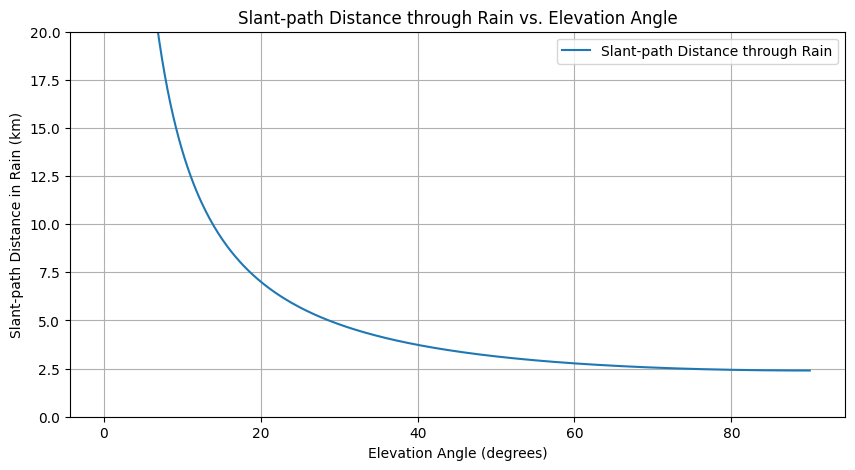

In [33]:

R_0_01 = 30  # Rain rate for 0.01% exceedance,  mm/h (double check)



# Constants
h_R = 2.4  # Rain height in km

# Elevation angles from 1 degree to near 90 degrees to avoid division by zero
elevation_angles = np.linspace(0, 90, 500)
elevation_radians = np.radians(elevation_angles)

# Calculate slant-path distance through rain
d_S = h_R / np.sin(elevation_radians)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(elevation_angles, d_S, label='Slant-path Distance through Rain')
plt.xlabel('Elevation Angle (degrees)')
plt.ylabel('Slant-path Distance in Rain (km)')
plt.title('Slant-path Distance through Rain vs. Elevation Angle')
plt.ylim(0, 20)  # Limit y-axis for better visibility
plt.legend()
plt.grid(True)
plt.show()

To incorporate rain attenuation into your model based on the ITU recommendation, you would typically follow these steps in your code:

1. Define the rain rate R_0.01 for your specific region, which could be obtained from ITU data or local meteorological data.
2. Calculate specific attenuation using the provided formulas, which will depend on the elevation angle and frequency.
3. Determine the slant-path distance d_s as h_R/sin(E).
4. Compute the rain attenuation L_r for different exceedance percentages (1%, 0.1%, 0.01%, and 0.001%) using the respective formulas.

500


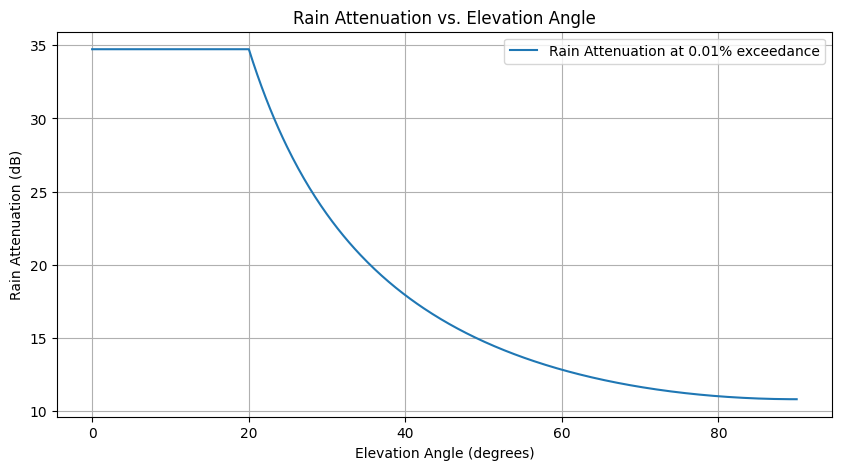

In [34]:
k = 0.15 + 0.003 * np.cos(elevation_radians)**2
alpha = (0.15 + 0.007 * np.cos(elevation_radians)**2) / k
#these are given in the project instructions, so im assuming
#the frequency of 26GHz is already accounted for
#ASK THE TAs!!!

gamma = k * R_0_01**alpha

# Calculate rain attenuation at 0.01% exceedance
L_r_0_01 = gamma * d_S

# Keep the attenuation at 20 degrees for angles less than 20 degrees
L_r_0_01[elevation_angles < 20] = L_r_0_01[np.argmin(np.abs(elevation_angles - 20))]
print(L_r_0_01.size)

# Plot the rain attenuation vs. elevation angle
plt.figure(figsize=(10, 5))
plt.plot(elevation_angles, L_r_0_01, label='Rain Attenuation at 0.01% exceedance')
plt.xlabel('Elevation Angle (degrees)')
plt.ylabel('Rain Attenuation (dB)')
plt.title('Rain Attenuation vs. Elevation Angle')
plt.grid(True)
plt.legend()
plt.show()

(The following formulas have been simplified, such that they approach the ITU
recommendation results for elevation angles E ≥ 20°. For smaller elevation angles (E < 20°),
consider the rain attenuation constant and equal to the one computed at 20° elevation.)




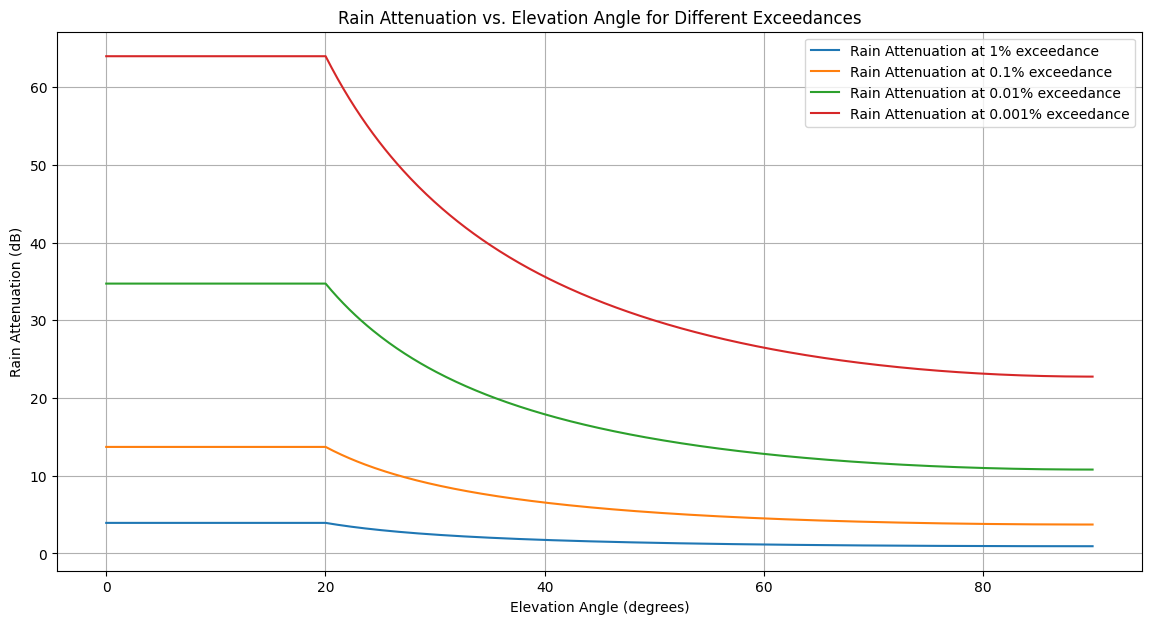

In [35]:
import numpy as np
import matplotlib.pyplot as plt




# exceedance percentages for which to calculate attenuation
exceedances = [1, 0.1, 0.01, 0.001]

plt.figure(figsize=(14, 7))
L_r_p_all_exceedances = []

# plot for each exceedance percentage
for p in exceedances:
    # calculate the attenuation for each exceedance percentage
    L_r_p = L_r_0_01 * (p / 0.01)**(-0.65 - 0.03*np.log(p) + 0.05*np.log(L_r_0_01))
    L_r_p_all_exceedances.append(L_r_p)
  
    plt.plot(elevation_angles, L_r_p, label=f'Rain Attenuation at {p}% exceedance')


plt.xlabel('Elevation Angle (degrees)')
plt.ylabel('Rain Attenuation (dB)')
plt.title('Rain Attenuation vs. Elevation Angle for Different Exceedances')
plt.legend()
plt.grid(True)
plt.show()


The relationship between the exceedance percentage and the rain attenuation is inverse — the higher the exceedance percentage (e.g., 1% vs. 0.01%), the lower the rainfall rate we're considering, and therefore, the lower the expected rain attenuation:

High exceedance percentages (e.g., 1%) refer to rain rates that are exceeded more frequently but are typically less intense. This results in lower rain attenuation values.
Low exceedance percentages (e.g., 0.01% or 0.001%) refer to more extreme, less frequent rain rates, leading to higher rain attenuation values.

 its just it was a bit counterintuitive to me because of the inverse relationship between exceedance percentage and rain attenuation. it still is, a bit, like, if we have 1% chance of getting above 30 mm/hour to me it just means theres gonna be more time while its raining than if we had 0.01% chance, but it wouldnt say anything in particular about the intensity of the rain, therefore from my intuition, there shouldnt be any difference in the rain attenuation, since it considers the worst case scenario and this should only care about the value of 30 mm/hour, and not the time this happens for

    Exceedance Percentage: This term doesn't refer to the amount of time it's raining but to the intensity of the rain. Specifically, a 1% exceedance rate means that during 1% of the total time over a year, the rain intensity is at or above a certain threshold. The 0.01% exceedance rate indicates that during only 0.01% of the time, the rain intensity is at or above a higher threshold.

    Intensity of Rain: The key is that these percentages correspond to different intensities of rain. A 1% exceedance rate corresponds to moderate intensity rain, and 0.01% corresponds to very high-intensity rain.

    Rain Attenuation: It's a function of the rain intensity, not the duration. The rain attenuation is higher for the higher intensity rains (which occur less frequently) than for the moderate intensity rains (which occur more frequently). 1% Exceedance: This would correspond to a rain intensity that's exceeded 1% of the time. It's a more common, less intense level of rain. The rain attenuation at this level is lower because the signal does not encounter as many raindrops along its path, which results in less signal degradation.



its time to incorporate the loss due to rain into the budget link and see
how rain affects the metrics calculated before (received power vs elevation angle -> SNR vs elevation angle -> channel capacity vs elevation angle -> total transmitted data during one pass ), for different rain attenutation exceedance percentages.

lets start with determining received power (copy paste code from before but add loss due to rain, with different percentage levels)

C:\Users\ocata\AppData\Local\Temp\ipykernel_10316\421762353.py:27: RuntimeWarning: divide by zero encountered in log
  L_r_p = L_r_0_01 * (p / 0.01)**(-0.65 - 0.03*np.log(p) + 0.05*np.log(L_r_0_01))


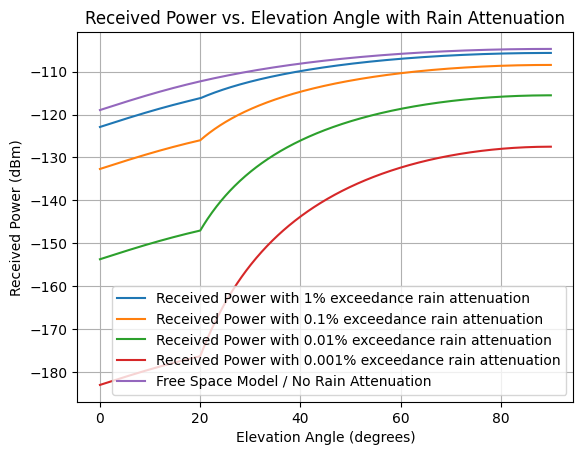

In [36]:
# Constants
EIRP_dBW = 40  # EIRP in dBW
h_R = 2.4  # Rain height in km
R_0_01 = 30  # Rain rate exceeded for 0.01% of an average year, in mm/h
exceedances = [1, 0.1, 0.01, 0.001, 0]


def satellite_distance(elevation_angle_deg):
    # Convert elevation angle from degrees to radians
    E = np.radians(elevation_angle_deg)
    # Calculate the distance d using the provided formula
    d = np.sqrt((R_E + h_s)**2 - R_E**2 * np.cos(E)**2) - R_E * np.sin(E)
    return d

def free_space_path_loss(d, f=frequency):
    # Calculate the free space path loss in dB
    wavelength = c / f
    path_loss = 20 * np.log10((4 * pi * d / wavelength))
    return path_loss

elevation_angles_90 = np.linspace(0, 90, 500)
distances_90 = [satellite_distance(e) for e in elevation_angles_90]
path_losses_90 = [free_space_path_loss(d) for d in satellite_distance(elevation_angles_90)]

L_r_p_all_exceedances = []
for p in exceedances:
    L_r_p = L_r_0_01 * (p / 0.01)**(-0.65 - 0.03*np.log(p) + 0.05*np.log(L_r_0_01))
    L_r_p_all_exceedances.append(L_r_p)
    # Plot
    #plt.plot(elevation_angles, L_r_p, label=f'Rain Attenuation at {p}% exceedance')


received_power_with_rain_all=[]
for i, p in enumerate(exceedances):
    
    pathloss_w_rain = np.array(path_losses_90) + np.array(L_r_p_all_exceedances[i])
    #plt.plot(elevation_angles, pathloss_w_rain, label=f'Rain Attenuation at {p*100}% exceedance')
    received_power_w_rain = EIRP_dBW + 30 - pathloss_w_rain #in dBm
    received_power_with_rain_all.append(received_power_w_rain)
    if p == 0:
        continue  # Skip the rest of this loop iteration
    plt.plot(elevation_angles_90, received_power_w_rain, label=f'Received Power with {p}% exceedance rain attenuation')
    #received_power_with_rain_all[i]=EIRP_dBW + 30 - pathloss_w_rain
    #plt.plot(elevation_angles,received_power_with_rain_all[i], label=f'received power w rain [dBm] at {p*100}% exceedance')

plt.plot(elevation_angles_90, EIRP_dBW + 30 - np.array(path_losses_90), label='Free Space Model / No Rain Attenuation')
plt.xlabel('Elevation Angle (degrees)')
plt.ylabel('Received Power (dBm)')
plt.title('Received Power vs. Elevation Angle with Rain Attenuation')
plt.legend()
plt.grid(True)
plt.show()






the value of rain attenuation at 0 degrees elevation angle is indeed undefined because a 0-degree elevation angle corresponds to the horizon line where the line of sight with the satellite is blocked by the Earth itself. However, for practical purposes and continuity in the model, the ITU recommendation you've mentioned suggests using the rain attenuation value at a 20-degree elevation angle for all lower angles.

This is because as the elevation angle approaches zero, the slant-path distance through the rain increases dramatically, which could unrealistically inflate the attenuation values. By capping the rain attenuation at the value it has at 20 degrees, you avoid this problem and maintain a realistic model for the satellite communication system.

---> adjusted rain attenuation (i have added the same value for 0 deg as for 20 deg for rain attenuation)

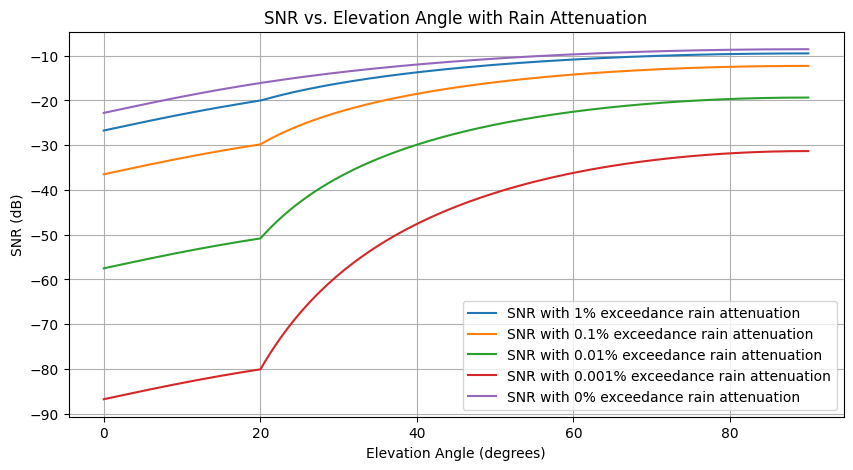

In [37]:
plt.figure(figsize=(10, 5))

# Assuming received_power_with_rain_all is a list of lists
# And the first element in received_power_with_rain_all corresponds to the no-rain case
for i, p in enumerate(exceedances):
   
    received_power_dBm_w_rain = received_power_with_rain_all[i]  # Access by index
    SNRs_dB = [calculate_SNR_dB(P_rx_w_rain, total_noise_power) for P_rx_w_rain in received_power_dBm_w_rain]
    
    # Plotting SNR for the current rain scenario
    plt.plot(elevation_angles_90, SNRs_dB, label=f'SNR with {p}% exceedance rain attenuation')


plt.xlabel('Elevation Angle (degrees)')
plt.ylabel('SNR (dB)')
plt.title('SNR vs. Elevation Angle with Rain Attenuation')
plt.legend()
plt.grid(True)
plt.show()


SNR decreases at attenuation from rain increases (expected). esp during heavy rain, high frequency signals will be affected quite badly. i just hope the attenuation values are correct

there gotta be a threshold for communication (research this) but ig anything below -20dB is unrecoverable from (so heavy rain + angle below 40 deg make comm impossible)


lets try to see the impact rain has on channel capacity/total transmitted data in one pass

Total transmitted data for 1% exceedance rain attenuation: 32.54 MB
Total transmitted data for 0.1% exceedance rain attenuation: 14.83 MB
Total transmitted data for 0.01% exceedance rain attenuation: 2.39 MB
Total transmitted data for 0.001% exceedance rain attenuation: 0.13 MB


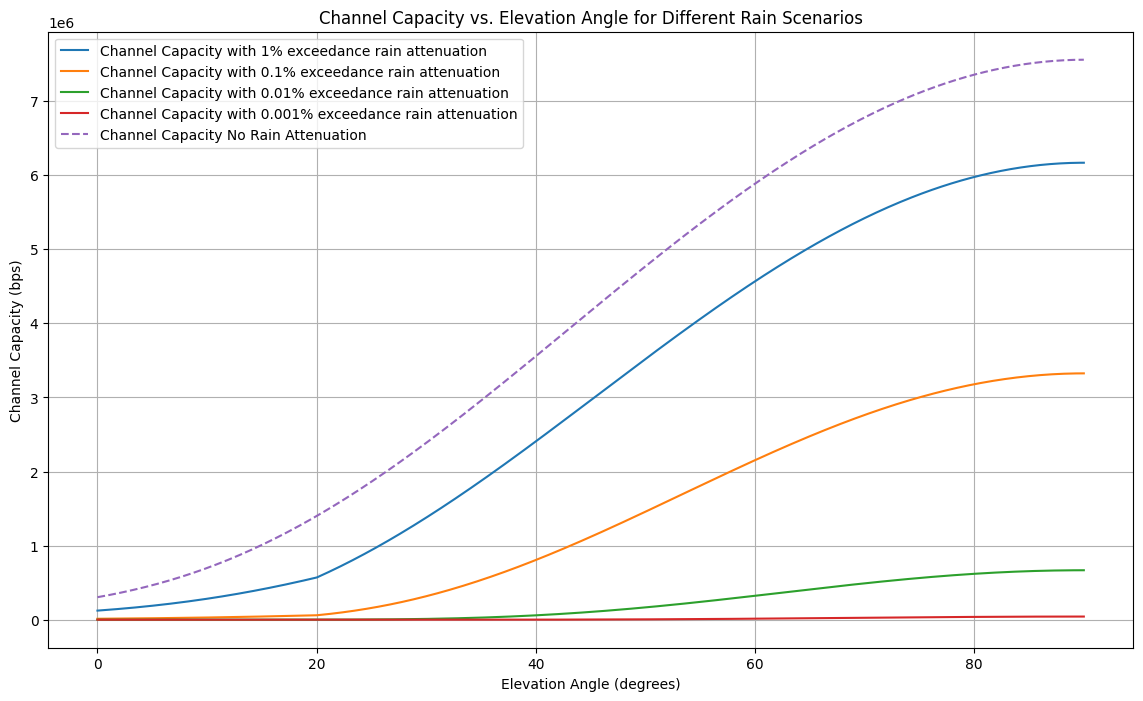

In [38]:
plt.figure(figsize=(14, 8))


for i, p in enumerate(exceedances):
    
    if p == 0:
        continue

    # calculate SNRs and channel capacities for each rain scenario
    received_power_dBm_w_rain = received_power_with_rain_all[i]
    SNRs_dB_w_rain = [calculate_SNR_dB(P_rx_w_rain, total_noise_power) for P_rx_w_rain in received_power_dBm_w_rain]
    SNRs_linear_w_rain = snr_db_to_linear(SNRs_dB_w_rain)
    channel_capacities_w_rain = B * np.log2(1 + SNRs_linear_w_rain)


    plt.plot(elevation_angles_90, channel_capacities_w_rain, label=f'Channel Capacity with {p}% exceedance rain attenuation')

    total_transmitted_data = np.trapz(channel_capacities_w_rain, elevation_angles_90)
    total_transmitted_data_MB = total_transmitted_data / (8 * 1024**2)  #mb
    print(f"Total transmitted data for {p}% exceedance rain attenuation: {total_transmitted_data_MB:.2f} MB")

# plot for the no-rain scenario
SNRs_linear_no_rain = snr_db_to_linear(SNRs_dB_no_rain)
channel_capacities_no_rain = B * np.log2(1 + SNRs_linear_no_rain)
plt.plot(elevation_angles_90, channel_capacities_no_rain[:500], label='Channel Capacity No Rain Attenuation', linestyle='--')

plt.xlabel('Elevation Angle (degrees)')
plt.ylabel('Channel Capacity (bps)')
plt.title('Channel Capacity vs. Elevation Angle for Different Rain Scenarios')
plt.legend()
plt.grid(True)
plt.show()

-----------
it is time for part 2 of the project

Let’s consider now that the ground station is equipped with a horizontal
Uniform Linear Array (ULA), which can have two types of elementary unit:
o An isotropic antenna with 𝑈(𝜃) = 𝑈_0
o A patch antenna (microstrip) with 𝑈(𝜃) = 𝑈_0 sin^2(𝜃)
This describes how the antenna radiates energy into space. It's a fundamental characteristic that tells us the direction in which the antenna radiates most effectively and how it attenuates radiation in other directions.

When individual antennas are combined into an array, their fields interact. The array factor describes this interaction and shows how the array directs the radiation. Beamforming is a result of constructive and destructive interference of these signals.

An array is a collection of antennas arranged in a certain geometrical configuration. By adjusting the phase and amplitude of the signal at each antenna element, the combined signal can be "steered" towards a specific direction or "shaped" to have a particular pattern. This is known as beamforming.

The array gain refers to the increase in directivity and, therefore, the gain that results from using multiple antenna elements together compared to using just a single element.

Thus, the product of the single element's radiation pattern with the array factor gives the overall radiation pattern of the array. This combination is essential because it tells us the actual performance of the entire array, not just the individual elements.

----

The antennas in the array are spaced by a distance λ/2. When doing beamforming, it is assumed that the ULA is always perfectly pointing to the satellite position.

Compute the array gain for both types of elementary units, and for 4, 8 and 16 array elements. For every ULA, draw the gain patterns (from 0° to 180°) for the following pointing angles: 90°, 45°, 30° and 0°. 

-----

An antenna's gain is a measure of its ability to direct or concentrate radio frequency energy in a particular direction. This is often achieved through the shape and design of the antenna. Two common types of antennas you mentioned are:

Isotropic antenna: This is a theoretical antenna that radiates power uniformly in all directions. It has a gain of 1 (or 0 dB, where dB is decibel, a logarithmic scale) because it doesn't concentrate power in any particular direction.
Patch antenna: This is a real antenna that directs its energy more efficiently in certain directions, creating a pattern with higher gain in certain areas (the main lobe) and lower gain elsewhere (side lobes).





but first, lets detemrine individual antenna radiation element pattern for isotropic and patch




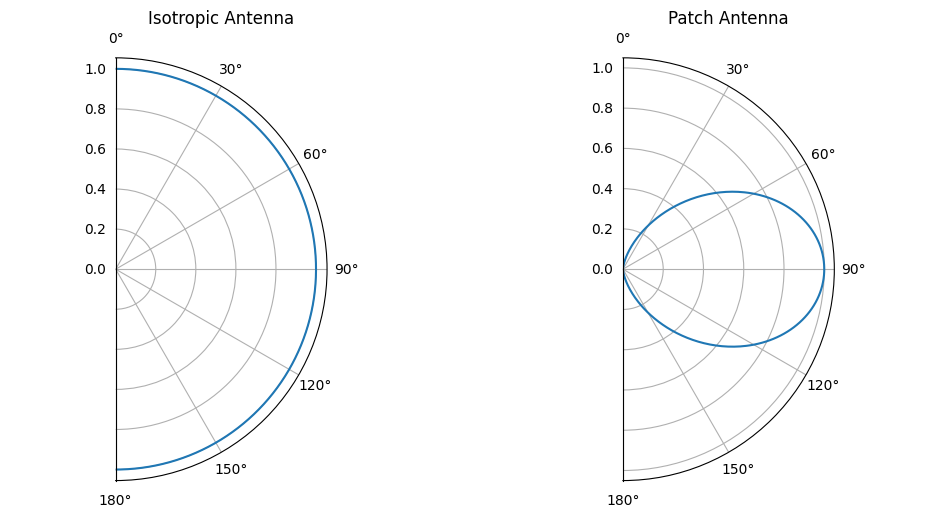

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the antenna radiation patterns as functions
def isotropic_pattern(theta):
    return np.full_like(theta, 1)  # Isotropic pattern has uniform gain

def patch_pattern(theta):
    return np.sin(theta)**2  # Patch antenna pattern

# Generate theta from 0 to pi (0 to 180 degrees)
theta = np.linspace(0, np.pi, 360)  # Angle in radians from 0 to 180 degrees
isotropic_gain = isotropic_pattern(theta)
patch_gain = patch_pattern(theta)

# Create polar plots
plt.figure(figsize=(12, 6))

# Isotropic antenna plot
ax1 = plt.subplot(1, 2, 1, polar=True)
ax1.plot(theta, isotropic_gain)
ax1.set_title("Isotropic Antenna")
ax1.set_theta_zero_location('N')  # Set the 0 degrees to the North
ax1.set_theta_direction(-1)  # Reverse direction to match the provided figure
ax1.set_thetamin(0)  # Set the plot to start at 0 degrees
ax1.set_thetamax(180)  # Set the plot to end at 180 degrees

# Patch antenna plot
ax2 = plt.subplot(1, 2, 2, polar=True)
ax2.plot(theta, patch_gain)
ax2.set_title("Patch Antenna")
ax2.set_theta_zero_location('N')  # Set the 0 degrees to the North
ax2.set_theta_direction(-1)  # Reverse direction to match the provided figure
ax2.set_thetamin(0)  # Set the plot to start at 0 degrees
ax2.set_thetamax(180)  # Set the plot to end at 180 degrees

plt.show()



Now, to implement beamforming in code, we would calculate the array factor (AF), which represents the collective effect of the antenna elements operating together.

The gain pattern of an antenna array will show multiple lobes:

Main lobe: The direction where the gain is maximum, ideally towards the target (like a satellite).
Side lobes: Smaller lobes where the gain is less than the main lobe but still significant.
Back lobe: A lobe directly opposite the main lobe.


For an array of antennas, the total gain pattern U_array(θ) is influenced by the individual element's pattern U_SE(θ) and the array factor AF(θ). The array factor accounts for the constructive and destructive interference of signals from multiple antenna elements spaced apart.

To calculate the gain patterns for different array configurations (4, 8, 16 elements) and different pointing angles (90°, 45°, 30°, 0°), we'd need to:

Determine the individual antenna element pattern (either isotropic or patch antenna pattern).
Compute the array factor for the specific number of elements and spacing.
Combine the array factor with the element pattern to obtain the array gain pattern.
Plot these patterns for the specified pointing angles.

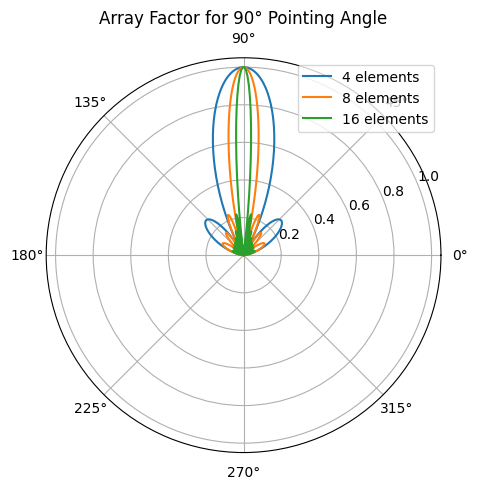

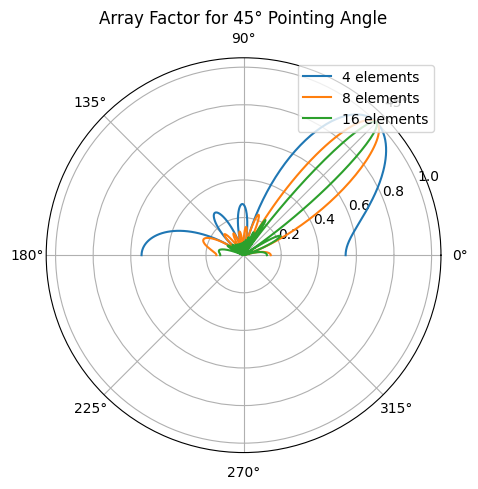

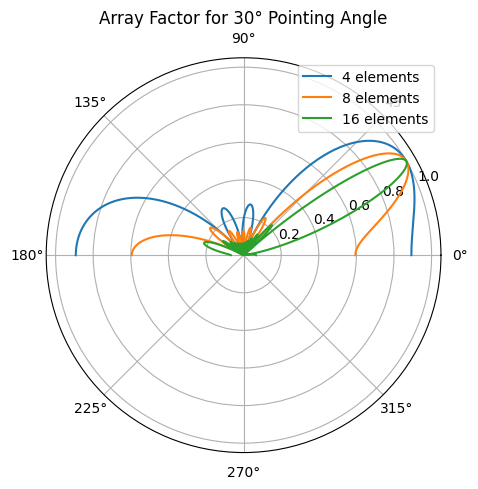

C:\Users\ocata\AppData\Local\Temp\ipykernel_21940\1601343049.py:30: RuntimeWarning: invalid value encountered in divide
  AF = np.exp(1j * (N - 1) * Psi / 2) * np.sin(N * Psi / 2) / np.sin(Psi / 2)


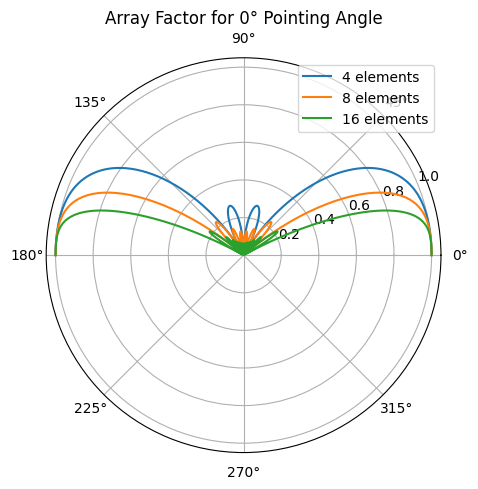

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Constants for the array
frequency = 26e9  # Frequency in Hz
c = 3e8  # Speed of light in m/s
lambda_ = c / frequency  # Wavelength in meters
beta = 2 * np.pi / lambda_  # Phase constant

array_factors = {} #for storage

#def patch_pattern(theta, theta_m):
#    # Adjust theta to account for the beamsteering
#    theta_steered = np.mod(theta - theta_m + np.pi, 2*np.pi) - np.pi
#    return np.sin(theta_steered)**2

# Define the array factor function for ULA
def array_factor_ula(N, theta_m_deg, theta_deg):
    # Convert angles from degrees to radians
    theta_rad = np.radians(theta_deg)
    theta_m_rad = np.radians(theta_m_deg)
    
    # Distance between antenna elements is lambda/2
    d = lambda_ / 2
    
    # Calculate the phase difference Psi for each antenna element
    Psi = beta * d * (np.cos(theta_rad) - np.cos(theta_m_rad))
    
    # Calculate the array factor AF for each angle theta
    AF = np.exp(1j * (N - 1) * Psi / 2) * np.sin(N * Psi / 2) / np.sin(Psi / 2)
    
    # Handle the case when Psi is close to 0
    AF[np.isclose(Psi, 0)] = N
    
    # Normalize the array factor to have a maximum of 1
    AF /= np.abs(AF).max()
    
    return np.abs(AF)  # We take the absolute value for plotting

theta_range = np.linspace(0, 180, 360)
theta_rad_range = np.radians(theta_range)


pointing_angles = [90, 45, 30, 0]
number_of_elements = [4, 8, 16]
#number_of_elements = [4]

# plot array factors for each pointing angle in a separate plot
for theta_m in pointing_angles:
    array_factors[theta_m] = {}
    plt.figure(figsize=(15, 5))
    
    for N in number_of_elements:
        AF = array_factor_ula(N, theta_m, theta_range)
        U_array_isotropic = AF**2 * isotropic_pattern(theta_rad_range)
        U_array_patch = AF**2 * patch_pattern(theta_rad_range)
        plt.polar(np.radians(theta_range), AF, label=f'{N} elements')
    
    plt.title(f'Array Factor for {theta_m}° Pointing Angle')
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()


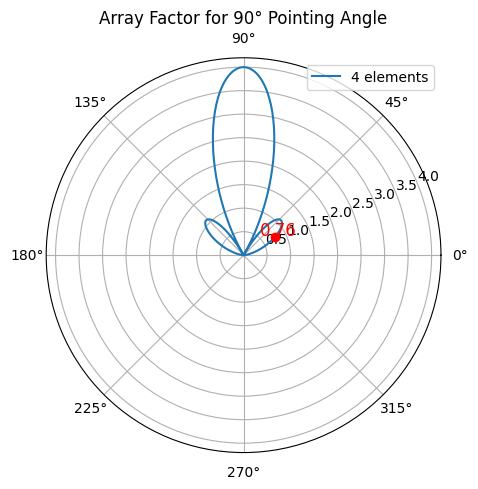

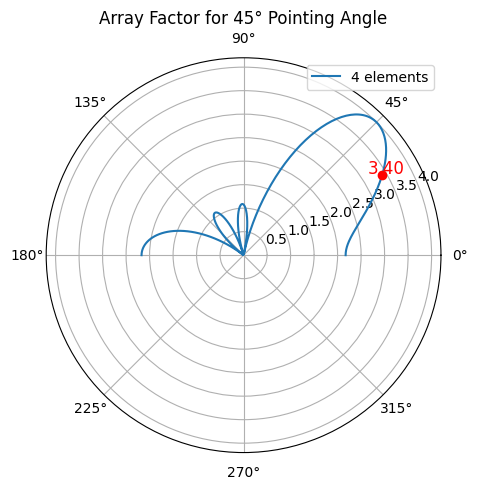

C:\Users\ocata\AppData\Local\Temp\ipykernel_21940\2514464137.py:25: RuntimeWarning: invalid value encountered in divide
  AF = np.exp(1j * (N - 1) * Psi / 2) * np.sin(N * Psi / 2) / np.sin(Psi / 2)


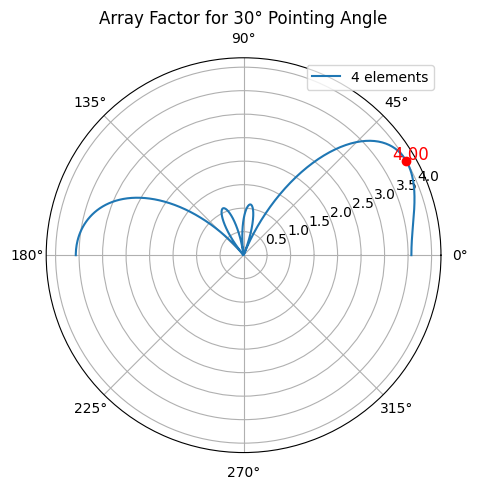

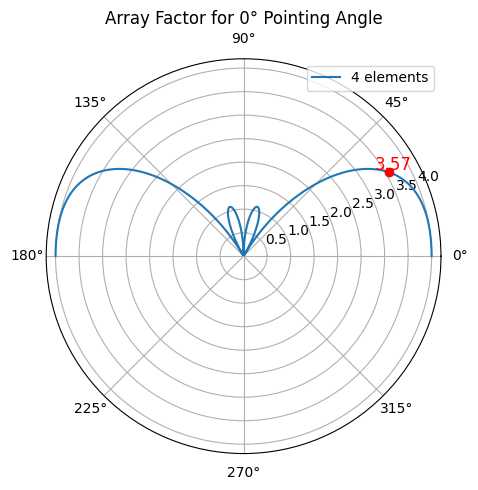

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Constants for the array
frequency = 26e9  # Frequency in Hz
c = 3e8  # Speed of light in m/s
lambda_ = c / frequency  # Wavelength in meters
beta = 2 * np.pi / lambda_  # Phase constant

array_factors = {}  # for storage

# Define the array factor function for ULA
def array_factor_ula(N, theta_m_deg, theta_deg):
    # Convert angles from degrees to radians
    theta_rad = np.radians(theta_deg)
    theta_m_rad = np.radians(theta_m_deg)
    
    # Distance between antenna elements is lambda/2
    d = lambda_ / 2
    
    # Calculate the phase difference Psi for each antenna element
    Psi = beta * d * (np.cos(theta_rad) - np.cos(theta_m_rad))
    
    # Calculate the array factor AF for each angle theta
    AF = np.exp(1j * (N - 1) * Psi / 2) * np.sin(N * Psi / 2) / np.sin(Psi / 2)
    
    # Handle the case when Psi is close to 0
    AF[np.isclose(Psi, 0)] = N
    
    # Normalize the array factor to have a maximum of 1
    #AF /= np.abs(AF).max()
    
    return np.abs(AF)  # We take the absolute value for plotting

theta_range = np.linspace(0, 180, 360)
theta_rad_range = np.radians(theta_range)

pointing_angles = [90, 45, 30, 0]
number_of_elements = [4]

# Define the direction of interest
direction_of_interest_deg = 30

# Plot array factors for each pointing angle in a separate plot
for theta_m in pointing_angles:
    array_factors[theta_m] = {}
    plt.figure(figsize=(15, 5))
    
    for N in number_of_elements:
        AF = array_factor_ula(N, theta_m, theta_range)
        direction_of_interest_rad = np.radians(direction_of_interest_deg)
        AF_direction_of_interest = array_factor_ula(N, theta_m, [direction_of_interest_deg])[0]
        
        # Plot the array factor
        plt.polar(np.radians(theta_range), AF, label=f'{N} elements')
        
        # Mark the direction of interest with a red dot and annotate the value
        plt.polar(direction_of_interest_rad, AF_direction_of_interest, 'ro')
        plt.annotate(f'{AF_direction_of_interest:.2f}', 
                     xy=(direction_of_interest_rad, AF_direction_of_interest), 
                     xytext=(direction_of_interest_rad, AF_direction_of_interest + 0.1),
                     color='red',
                     fontsize=12,
                     ha='center')

    plt.title(f'Array Factor for {theta_m}° Pointing Angle')
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()


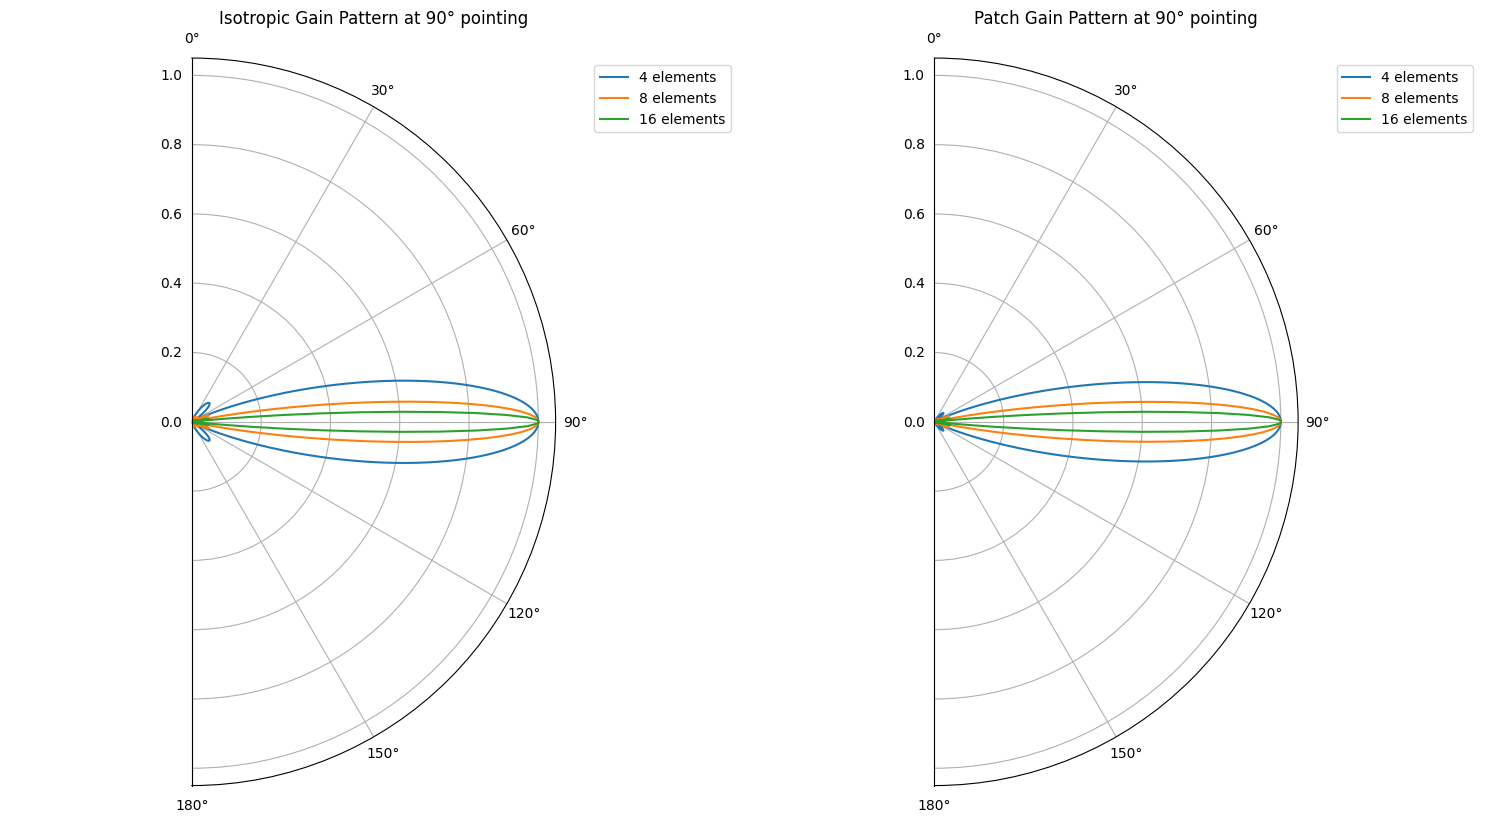

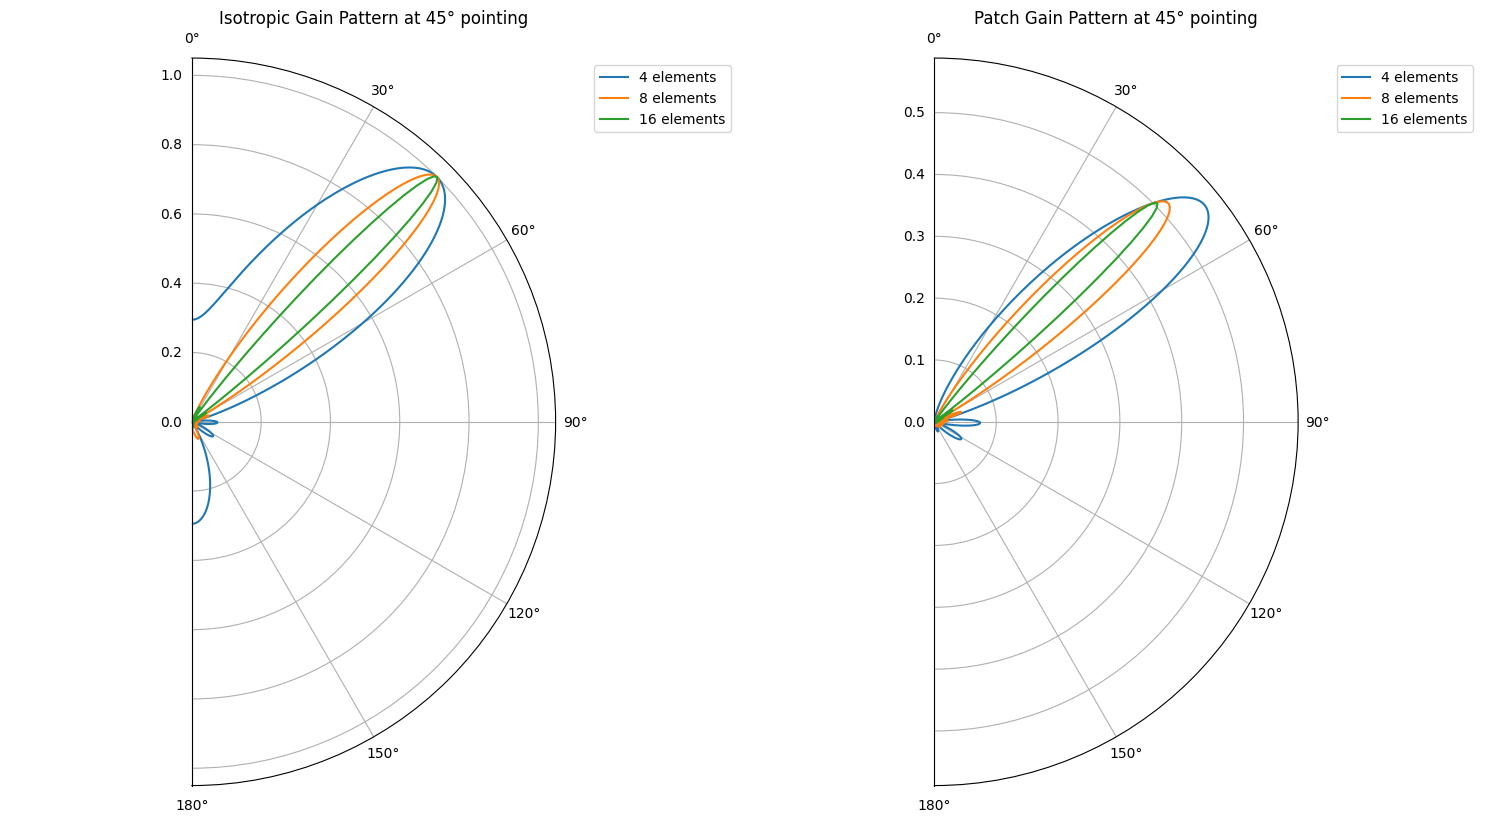

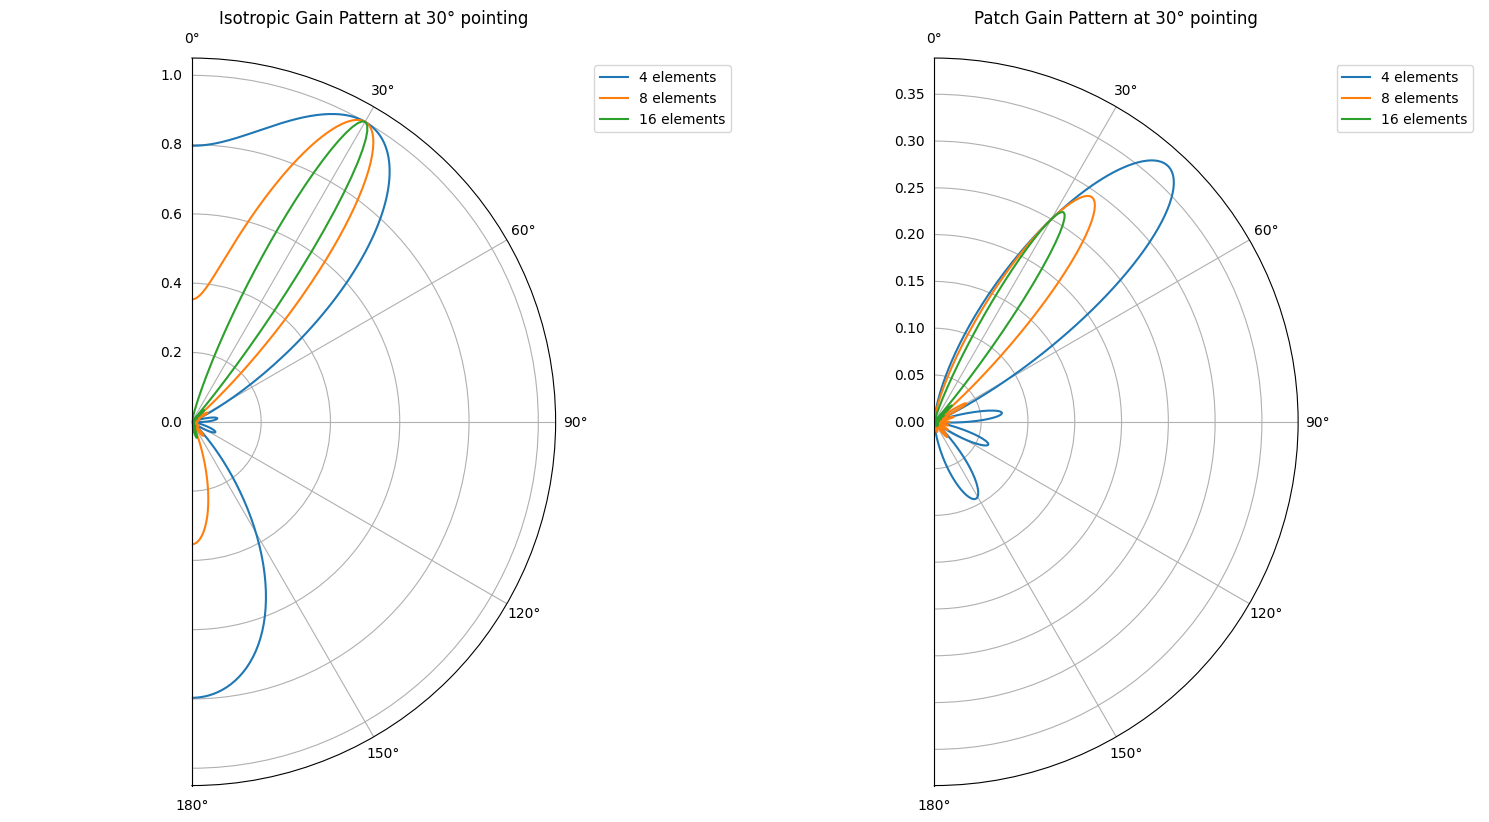

C:\Users\ocata\AppData\Local\Temp\ipykernel_21940\2258321234.py:24: RuntimeWarning: invalid value encountered in divide
  AF = np.exp(1j * (N - 1) * Psi / 2) * np.sin(N * Psi / 2) / np.sin(Psi / 2)


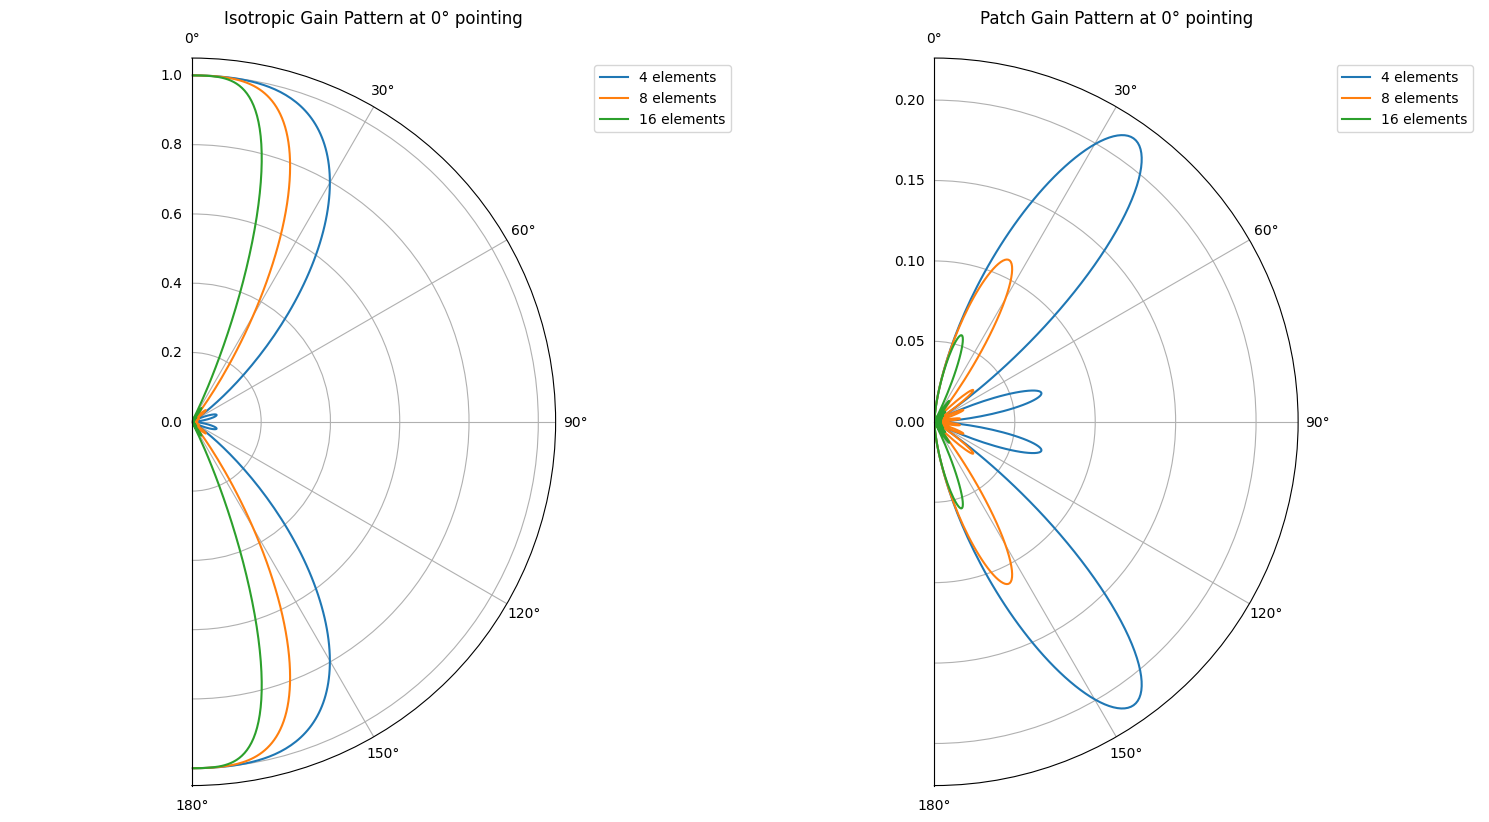

In [9]:
import numpy as np
import matplotlib.pyplot as plt


frequency = 26e9  
c = 3e8  
lambda_ = c / frequency  #[m]
beta = 2 * np.pi / lambda_  #phase constant


def isotropic_pattern(theta):
    return np.full_like(theta, 1) 

def patch_pattern(theta):
    return np.sin(theta)**2  

# Define the array factor function for ULA - IN RADIANS
def array_factor_ula(N, theta_m, theta_range):
    d = lambda_ / 2  
    beta = 2 * np.pi / lambda_ 
    #phase difference Psi for each antenna element
    Psi = beta * d * (np.cos(theta_range) - np.cos(theta_m))
    #array factor AF for each angle theta
    AF = np.exp(1j * (N - 1) * Psi / 2) * np.sin(N * Psi / 2) / np.sin(Psi / 2)
    
    #handle the case when Psi is close to 0
    AF[np.isclose(Psi, 0)] = N
    AF /= np.abs(AF).max()
    return np.abs(AF)  

# Plotting parameters
theta_range = np.linspace(0, np.pi, 360)  # def theta range from 0 to 180 degrees (in radians)
pointing_angles_rad = [np.pi/2, np.pi/4, np.pi/6, 0]  
number_of_elements = [4, 8, 16]

U_arrays = {
    'isotropic': {N: {theta_m: [] for theta_m in pointing_angles_rad} for N in number_of_elements},
    'patch': {N: {theta_m: [] for theta_m in pointing_angles_rad} for N in number_of_elements}
}


for theta_m in pointing_angles_rad:
    plt.figure(figsize=(15, 8))
    for N in number_of_elements:
        AF = array_factor_ula(N, theta_m, theta_range)
        U_array_isotropic = AF**2 * isotropic_pattern(theta_range)
        U_array_patch = AF**2 * patch_pattern(theta_range)

        ax1 = plt.subplot(1, 2, 1, polar=True)
        ax1.plot(theta_range, U_array_isotropic, label=f'{N} elements')
        ax1.set_title(f"Isotropic Gain Pattern at {np.degrees(theta_m):.0f}° pointing")
        ax1.set_theta_zero_location('N')
        ax1.set_theta_direction(-1)
        ax1.set_thetamin(0)
        ax1.set_thetamax(180)
        
        ax2 = plt.subplot(1, 2, 2, polar=True)
        ax2.plot(theta_range, U_array_patch, label=f'{N} elements')
        ax2.set_title(f"Patch Gain Pattern at {np.degrees(theta_m):.0f}° pointing")
        ax2.set_theta_zero_location('N')
        ax2.set_theta_direction(-1)
        ax2.set_thetamin(0)
        ax2.set_thetamax(180)

        #U_arrays['isotropic'][N][theta_m] = U_array_isotropic
        #U_arrays['patch'][N][theta_m] = U_array_patch
        #evaluate this but instead of theta_m being 4 angles, we store U_arrays['isotropic'][N] for every degree 0-180
        #we sweep through these 180 values of U_arrays['isotropic'][N][sweep_theta_angle] and pick the maximum
        #and we stor it as being the maximum gain we use for antenna type, number of antennas in array
    ax1.legend(loc='upper right')
    ax2.legend(loc='upper right')
    plt.tight_layout()
    plt.show()


C:\Users\ocata\AppData\Local\Temp\ipykernel_21940\1910468273.py:31: RuntimeWarning: invalid value encountered in divide
  AF = np.exp(1j * (N - 1) * Psi / 2) * np.sin(N * Psi / 2) / np.sin(Psi / 2)


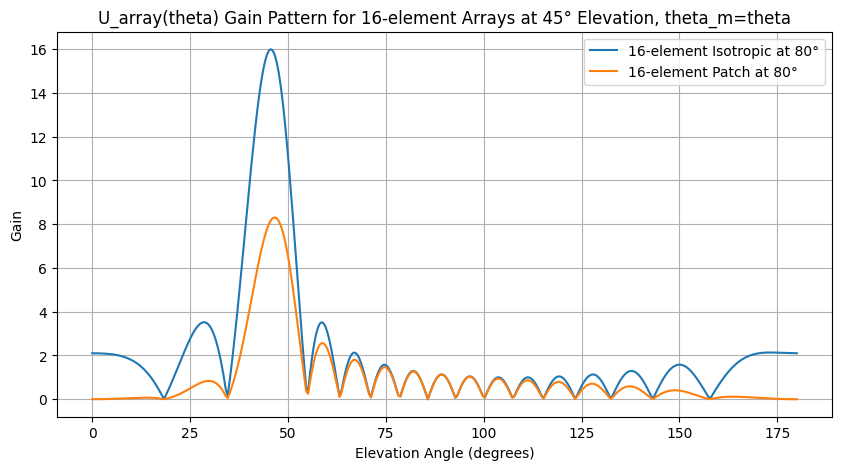

In [65]:
import numpy as np
import matplotlib.pyplot as plt

# Constants for the array
frequency = 26e9  # Frequency in Hz
c = 3e8  # Speed of light in m/s
lambda_ = c / frequency  # Wavelength in meters
number_of_elements = [4, 8, 16]

# Define the theta range from 0 to 180 degrees (in radians)
theta_range = np.linspace(0, np.pi, 360)

# Create dictionary with string keys
U_arrays = {
    'isotropic': {N: {} for N in number_of_elements},
    'patch': {N: {} for N in number_of_elements}
}

def isotropic_pattern(theta):
    return np.full_like(theta, 1)  # Uniform gain across all angles

def patch_pattern(theta):
    return np.sin(theta)**2  # Gain pattern of the patch antenna

def array_factor_ula(N, theta_m, theta_range):
    d = lambda_ / 2  
    beta = 2 * np.pi / lambda_ 
    #phase difference Psi for each antenna element
    Psi = beta * d * (np.cos(theta_range) - np.cos(theta_m))
    #array factor AF for each angle theta
    AF = np.exp(1j * (N - 1) * Psi / 2) * np.sin(N * Psi / 2) / np.sin(Psi / 2)
    
    #handle the case when Psi is close to 0
    AF[np.isclose(Psi, 0)] = N
    #AF /= np.abs(AF).max()
    return np.abs(AF)  

# Compute U_arrays for each pointing angle matching the
# Example adjustment in the loop that populates U_arrays
for N in number_of_elements:
    for theta_m_rad in theta_range:
        theta_m_deg = str(int(np.degrees(theta_m_rad)))
        
        AF = array_factor_ula(N, theta_m_rad, theta_range)
        #print(AF)
        isotropic_gain = isotropic_pattern(theta_range)  # Ensure this is an array of size 360
        patch_gain = patch_pattern(theta_range)          # Ensure this is an array of size 360
        U_arrays['isotropic'][N][theta_m_deg] = AF * isotropic_gain
        U_arrays['patch'][N][theta_m_deg] = AF * patch_gain

        # Debug output to check what's being stored
        if theta_m_deg == 0:  # Just as an example, check the first entry
            print("Check data structure:", U_arrays['isotropic'][N][str(theta_m_deg)])


# Plotting for a specific elevation angle where pointing angle = elevation angle
specific_angle = '45'  # Use a string key
plt.figure(figsize=(10, 5))
plt.plot(np.degrees(theta_range), U_arrays['isotropic'][16][specific_angle], label='16-element Isotropic at 80°')
plt.plot(np.degrees(theta_range), U_arrays['patch'][16][specific_angle], label='16-element Patch at 80°')
plt.xlabel('Elevation Angle (degrees)')
plt.ylabel('Gain')
plt.title(f'U_array(theta) Gain Pattern for 16-element Arrays at {specific_angle}° Elevation, theta_m=theta')
plt.legend()
plt.grid(True)
plt.show()


In [57]:
import numpy as np
import matplotlib.pyplot as plt


theta_range = np.linspace(0, np.pi, 180) 
pointing_angles_rad = [np.pi/2, np.pi/4, np.pi/6, 0]  
number_of_elements = [4, 8, 16] 

# calculate gain based on U_array and angle theta
def calculate_gain(U_array, theta_rad):
    
    sin_theta = np.sin(theta_rad)
    #numerical integration using the trapezoidal rule
    integral = np.trapz(U_array[theta_rad] * sin_theta, theta_rad)
    gain = U_array[theta_rad] / (integral / (2 * np.pi))

    return gain



   
        

In [22]:
array=U_arrays['isotropic'][4]
print(array)

{'0': array([4.        , 3.99999941, 3.99999064, 3.99995261, 3.99985029,
       3.99963468, 3.99924291, 3.9985984 , 3.99761093, 3.99617689,
       3.99417945, 3.99148888, 3.98796288, 3.98344691, 3.97777476,
       3.97076902, 3.96224175, 3.95199518, 3.93982259, 3.92550923,
       3.90883338, 3.88956756, 3.86747986, 3.8423354 , 3.81389791,
       3.78193152, 3.74620263, 3.70648194, 3.66254662, 3.61418262,
       3.56118709, 3.50337092, 3.44056136, 3.37260471, 3.29936911,
       3.22074734, 3.13665956, 3.04705616, 2.9519204 , 2.85127109,
       2.74516501, 2.63369927, 2.51701333, 2.39529092, 2.26876146,
       2.13770131, 2.00243451, 1.86333314, 1.72081717, 1.57535387,
       1.42745662, 1.27768315, 1.12663324, 0.97494582, 0.8232954 ,
       0.67238796, 0.52295626, 0.37575452, 0.2315526 , 0.09112968,
       0.0447325 , 0.17525685, 0.29967837, 0.41725188, 0.52725995,
       0.62902076, 0.72189609, 0.80529902, 0.87870149, 0.94164143,
       0.99372947, 1.03465507, 1.06419195, 1.08220277, 1

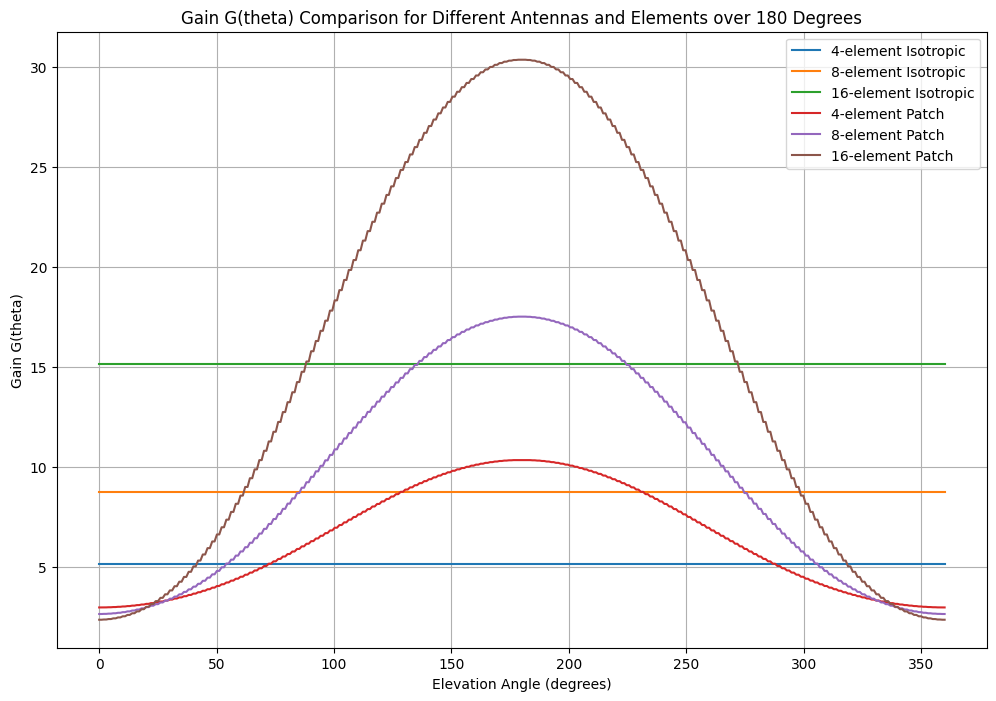

In [74]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
frequency = 26e9  # Frequency in Hz
c = 3e8  # Speed of light in m/s
lambda_ = c / frequency  # Wavelength in meters
theta_range = np.linspace(0, np.pi,360)  # 0 to 180 degrees in radians
number_of_elements = [4, 8, 16]
antenna_types = ['isotropic', 'patch']

# Assuming U_arrays is already populated correctly with U(theta) values
# Example: U_arrays['isotropic'][16]['45']

# Function to calculate gain index by index
def calculate_gain(U_array, theta_rad):
    sin_theta = np.sin(theta_rad)
    integral = np.trapz(U_array * sin_theta, theta_rad)  # Integrate U(theta) * sin(theta) over theta
    gain = U_array / (integral / (4 * np.pi))  # Normalize by the integral
    return gain

# Dictionary to store G(theta) for different configurations
G_values_dict = {}

# Iterate over each type of antenna and number of elements
for antenna_type in antenna_types:
    for N in number_of_elements:
        # Collect U(theta) for each theta_m in a matrix
        U_all = np.array([U_arrays[antenna_type][N][str(int(np.degrees(theta)))] for theta in theta_range])
        
        # Calculate the integral over the whole range for normalization
        sin_theta = np.sin(theta_range)
        integral_over_all_theta =  np.pi * np.trapz(U_all * sin_theta[:, None], theta_range, axis=0)

        # Compute G(theta) for each theta
        G_values = np.zeros(180)
        for i, theta in enumerate(theta_range[:180]):
            theta_deg = str(int(np.degrees(theta)))
            U_theta = U_arrays[antenna_type][N][theta_deg]
            G_theta = U_theta / (integral_over_all_theta.mean() / (4 * np.pi))
            G_values[i] = np.max(G_theta)
        
        # Store the computed G_values
        if antenna_type not in G_values_dict:
            G_values_dict[antenna_type] = {}
        G_values_dict[antenna_type][N] = G_values
        # Mirror the values to cover 360 degrees
        mirrored_values = np.concatenate((G_values, G_values[::-1]))

        # Store the mirrored values for plotting
        G_values_dict[antenna_type][N] = mirrored_values

# Plot G(theta) for all configurations
plt.figure(figsize=(12, 8))
for antenna_type in antenna_types:
    for N in number_of_elements:
        plt.plot(np.degrees(np.linspace(0, 2*np.pi, 360)), G_values_dict[antenna_type][N], label=f'{N}-element {antenna_type.capitalize()}')

plt.title('Gain G(theta) Comparison for Different Antennas and Elements over 180 Degrees')
plt.xlabel('Elevation Angle (degrees)')
plt.ylabel('Gain G(theta)')
plt.legend()
plt.grid(True)
plt.show()


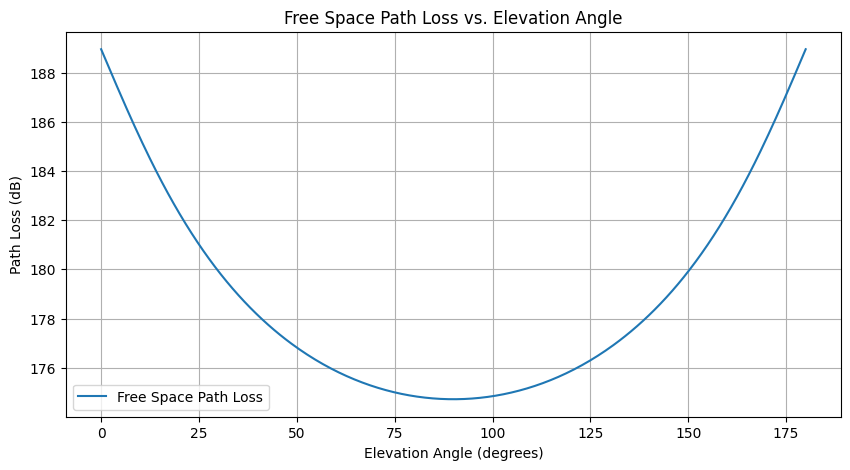

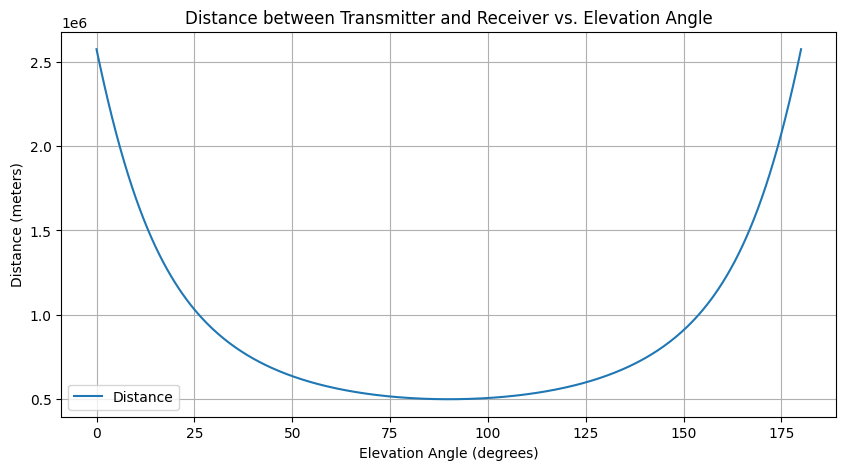

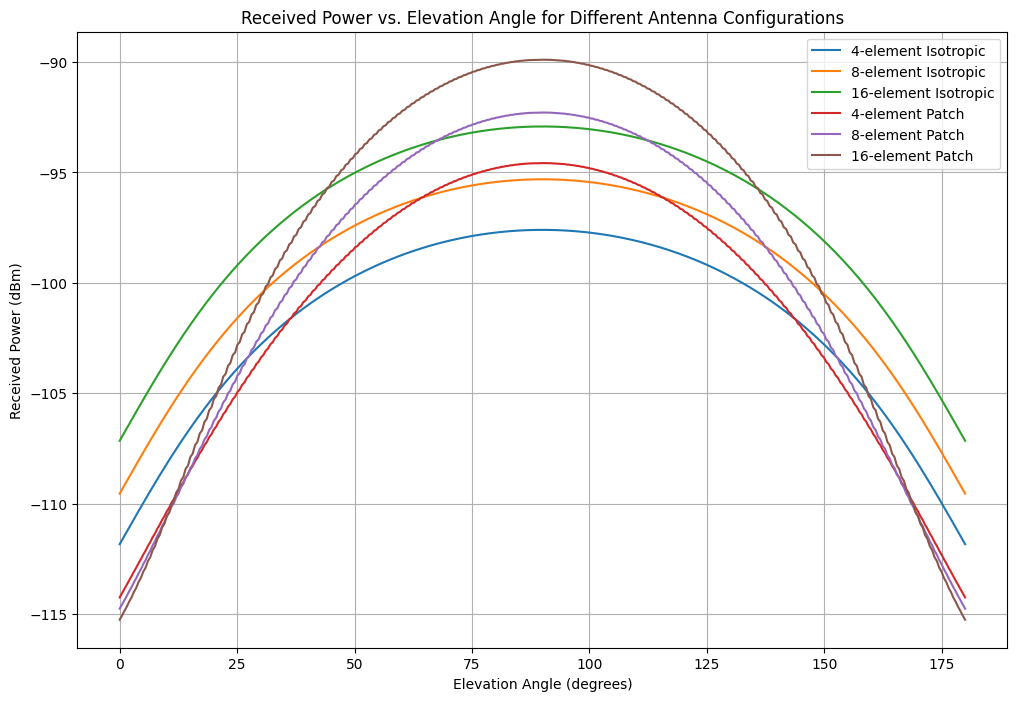

In [93]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
frequency = 26e9  # Frequency in Hz
c = 3e8  # Speed of light in m/s
R_E = 6371e3  # Earth radius in meters
h_s = 500e3  # Satellite altitude in meters
EIRP_dBW = 40  # Given EIRP in dBW

# Given G_values_dict from the previous calculations
# G_values_dict = {...} # This should be already defined

# Function to calculate satellite distance
def satellite_distance(elevation_angle_deg):
    E = np.radians(elevation_angle_deg)
    d = np.sqrt((R_E + h_s)**2 - R_E**2 * np.cos(E)**2) - R_E * np.sin(E)
    return d

# Function to calculate free space path loss
def free_space_path_loss(d, f=frequency):
    wavelength = c / f
    path_loss = 20 * np.log10((4 * np.pi * d / wavelength))
    return path_loss

# Convert dBW to Watts
def dBW_to_Watts(dBW):
    return 10**(dBW / 10)

# Function to calculate received power in dBm
def received_power_dBm(EIRP_dBW, path_loss_dB, gain_dB):
    EIRP_dBm = EIRP_dBW + 30
    P_rx_dBm = EIRP_dBm + gain_dB - path_loss_dB
    return P_rx_dBm

# Define elevation angles
elevation_angles = np.linspace(0, 180, 360)

# Calculate distances and path losses
distances = [satellite_distance(e) for e in elevation_angles]
path_losses = [free_space_path_loss(d) for d in distances]

# Plot Free Space Path Loss vs. Elevation Angle
plt.figure(figsize=(10, 5))
plt.plot(elevation_angles, path_losses, label='Free Space Path Loss')
plt.xlabel('Elevation Angle (degrees)')
plt.ylabel('Path Loss (dB)')
plt.title('Free Space Path Loss vs. Elevation Angle')
plt.grid(True)
plt.legend()
plt.show()

# Plot Distance vs. Elevation Angle
plt.figure(figsize=(10, 5))
plt.plot(elevation_angles, distances, label='Distance')
plt.xlabel('Elevation Angle (degrees)')
plt.ylabel('Distance (meters)')
plt.title('Distance between Transmitter and Receiver vs. Elevation Angle')
plt.grid(True)
plt.legend()
plt.show()

# Initialize the figure for Received Power vs. Elevation Angle
plt.figure(figsize=(12, 8))

# Initialize a dictionary to store received power values
received_powers_dict = {ant_type: {elem_count: [] for elem_count in number_of_elements} for ant_type in antenna_types}

# Iterate over each type of antenna and number of elements to calculate received power
for antenna_type in G_values_dict:
    for N in G_values_dict[antenna_type]:
        gain_dB = G_values_dict[antenna_type][N][:360]  # Ensure the gain values match the elevation angles
        gain_dB=10*np.log10(gain_dB)
        # Calculate received power in dBm for each path loss value and gain
        received_powers_dBm = [received_power_dBm(EIRP_dBW, pl, g) for pl, g in zip(path_losses, gain_dB)]
        
        # Store the received power values
        received_powers_dict[antenna_type][N] = received_powers_dBm

        # Plot received power vs. elevation angle
        plt.plot(elevation_angles, received_powers_dBm, label=f'{N}-element {antenna_type.capitalize()}')

# Final plot adjustments
plt.xlabel('Elevation Angle (degrees)')
plt.ylabel('Received Power (dBm)')
plt.title('Received Power vs. Elevation Angle for Different Antenna Configurations')
plt.grid(True)
plt.legend()
plt.show()


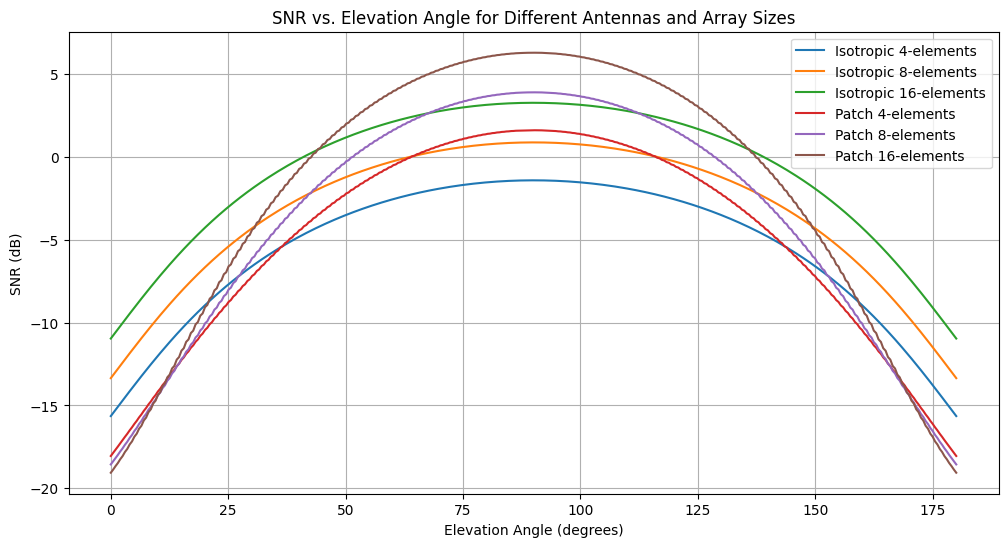

In [97]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
k_B = 1.38e-23  # Boltzmann constant in J/K
system_temperature_K = 275  # Example system temperature in Kelvin
bandwidth_Hz = 40e6  # Example bandwidth in Hz (40 MHz)
noise_figure_dB = 2  # Example noise figure in dB

# Function to convert dBm to Watts
def dBm_to_Watts(dBm):
    """Convert dBm to Watts"""
    return 10 ** ((dBm - 30) / 10)

# Function to calculate SNR
def calculate_SNR(received_powers_dBm, system_temperature, bandwidth, noise_figure_dB):
    """Calculate the SNR for an array of received power values."""
    noise_figure_linear = 10 ** (noise_figure_dB / 10)
    # Convert received power from dBm to Watts
    received_power_W = np.array([dBm_to_Watts(p) for p in received_powers_dBm])
    # Calculate noise power in Watts
    noise_power_W = k_B * system_temperature * bandwidth * noise_figure_linear
    # Calculate SNR
    SNR_linear = received_power_W / noise_power_W
    # Convert SNR to dB
    SNR_dB = 10 * np.log10(SNR_linear)
    return SNR_dB

# Assume received_powers_dict is already defined

# Define elevation angles matching the length of gain values
elevation_angles = np.linspace(0, 180, 360)

# Initialize a dictionary to store SNR values
SNR_values = {ant_type: {elem_count: [] for elem_count in number_of_elements} for ant_type in antenna_types}

# Calculate SNR for each configuration
for antenna_type in antenna_types:
    for element_count in number_of_elements:
        # Retrieve the stored received power values
        received_powers_dBm = received_powers_dict[antenna_type][element_count]  # Ensure alignment with elevation angles
        # Calculate SNR
        SNR_values[antenna_type][element_count] = calculate_SNR(received_powers_dBm, system_temperature_K, bandwidth_Hz, noise_figure_dB)

# Plotting the SNR vs Elevation Angle for different antenna configurations
plt.figure(figsize=(12, 6))
for antenna_type in antenna_types:
    for element_count in number_of_elements:
        plt.plot(elevation_angles, SNR_values[antenna_type][element_count], label=f'{antenna_type.capitalize()} {element_count}-elements')
plt.xlabel('Elevation Angle (degrees)')
plt.ylabel('SNR (dB)')
plt.title('SNR vs. Elevation Angle for Different Antennas and Array Sizes')
plt.grid(True)
plt.legend()
plt.show()


360
7021.093616361821
360
8289.41966649229
360
9559.977977694276
360
4221.261976626506
360
4845.192705980963
360
5475.25955211818


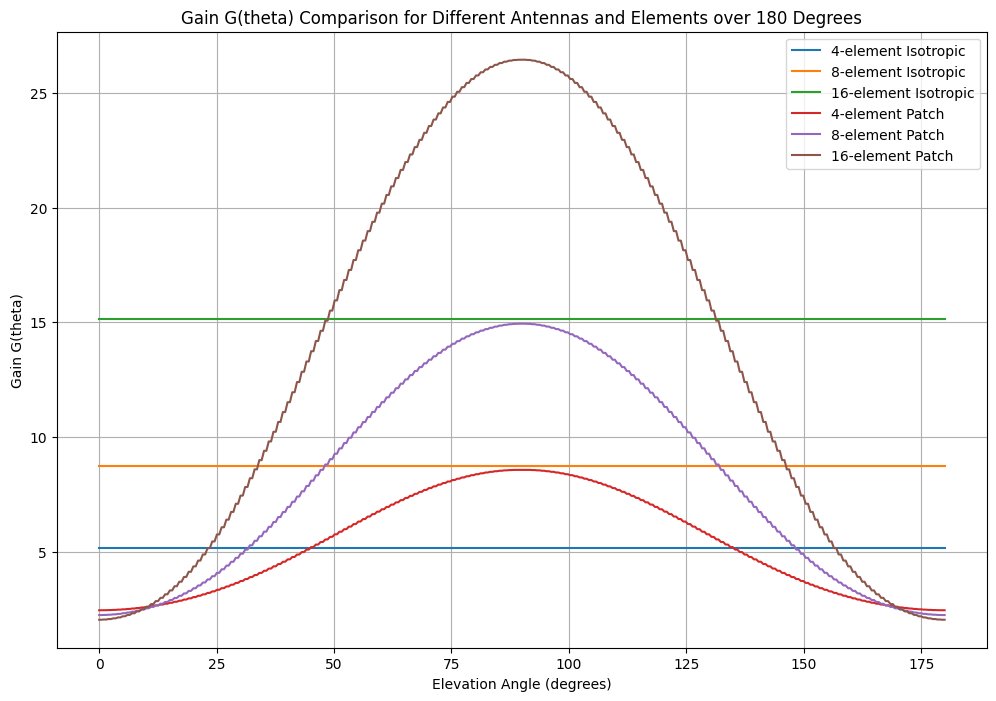

In [95]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
frequency = 26e9  # Frequency in Hz
c = 3e8  # Speed of light in m/s
lambda_ = c / frequency  # Wavelength in meters
theta_range = np.linspace(0, np.pi, 360)
sin_theta = np.sin(theta_range)  # Sin(theta) for the integration

# Assume U_arrays is defined and filled correctly
# Define antenna types and number of elements
antenna_types = ['isotropic', 'patch']
number_of_elements = [4, 8, 16]

# Dictionary to store G(theta) for different configurations
G_values_dict = {}

# Iterate over each type of antenna and number of elements
for antenna_type in antenna_types:
    for N in number_of_elements:
        # Collect U(theta) for each theta_m in a matrix
        U_all = np.array([U_arrays[antenna_type][N][str(int(np.degrees(theta)))] for theta in theta_range])
        
        # Calculate the integral over the whole range for normalization
        integral_over_all_theta = 2 * np.pi * np.trapz(U_all * sin_theta, theta_range, axis=1)
        print(len(integral_over_all_theta))
        print(sum(integral_over_all_theta))
        # Compute G(theta) for each theta up to 180
        G_values = np.zeros(180)  # Store values only up to 180 degrees
        for i, theta in enumerate(theta_range[:180]):
            theta_deg = str(int(np.degrees(theta)))
            U_theta = U_arrays[antenna_type][N][theta_deg]
            G_theta = U_theta / (integral_over_all_theta.mean() / (4 * np.pi))
            G_values[i] = 2*np.max(G_theta)
        
        # Store the computed G_values
        if antenna_type not in G_values_dict:
            G_values_dict[antenna_type] = {}
        G_values_dict[antenna_type][N] = G_values
        # Mirror the values to cover 180 degrees
        mirrored_values = np.concatenate((G_values, G_values[::-1]))

        # Store the mirrored values for plotting
        G_values_dict[antenna_type][N] = mirrored_values

# Plot G(theta) for all configurations
plt.figure(figsize=(12, 8))
for antenna_type in antenna_types:
    for N in number_of_elements:
        plt.plot(np.degrees(theta_range[:360]), G_values_dict[antenna_type][N], label=f'{N}-element {antenna_type.capitalize()}')

plt.title('Gain G(theta) Comparison for Different Antennas and Elements over 180 Degrees')
plt.xlabel('Elevation Angle (degrees)')
plt.ylabel('Gain G(theta)')
plt.legend()
plt.grid(True)
plt.show()


In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
frequency = 26e9  # Frequency in Hz
c = 3e8  # Speed of light in m/s
lambda_ = c / frequency  # Wavelength in meters
theta_range = np.linspace(0, np.pi, 360)
sin_theta = np.sin(theta_range)  # Sin(theta) for the integration

# Assume U_arrays is defined and filled correctly
# Define antenna types and number of elements
antenna_types = ['isotropic', 'patch']
number_of_elements = [4, 8, 16]

# Dictionary to store G(theta) for different configurations
G_values_dict = {}

# Iterate over each type of antenna and number of elements
for antenna_type in antenna_types:
    for N in number_of_elements:
        # Collect U(theta) for each theta_m in a matrix
        U_all = np.array([U_arrays[antenna_type][N][str(int(np.degrees(theta)))] for theta in theta_range])
        
        # Calculate the integral over the whole range for normalization
        integral_over_all_theta = 2 * np.pi * np.trapz(U_all * sin_theta, theta_range, axis=1)
        
        # Compute G(theta) for each theta up to 180
        G_values = np.zeros(180)  # Store values only up to 180 degrees
        for i, theta in enumerate(theta_range[:180]):
            theta_deg = str(int(np.degrees(theta)))
            U_theta = U_arrays[antenna_type][N][theta_deg]
            G_theta = U_theta / (integral_over_all_theta.mean() / (4 * np.pi))
            G_values[i] = np.max(G_theta)
        
        # Store the computed G_values
        if antenna_type not in G_values_dict:
            G_values_dict[antenna_type] = {}
        G_values_dict[antenna_type][N] = G_values
        # Mirror the values to cover 180 degrees
        mirrored_values = np.concatenate((G_values, G_values[::-1]))

        # Store the mirrored values for plotting
        G_values_dict[antenna_type][N] = mirrored_values


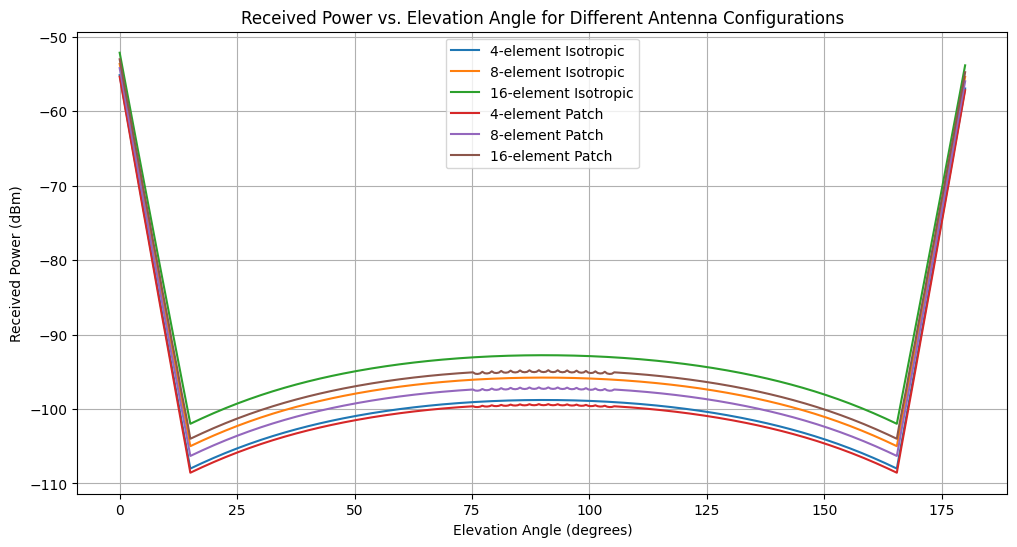

In [31]:
def received_power_dBm(EIRP_dBW, path_loss_dB, gain_dB):
    EIRP_dBm = EIRP_dBW + 30  # Convert from dBW to dBm
    P_rx_dBm = EIRP_dBm - path_loss_dB + gain_dB
    return P_rx_dBm

def moving_average(data, window_size):
    window = np.ones(int(window_size)) / float(window_size)
    return np.convolve(data, window, 'same')

def plot_received_power_for_antennas(elevation_angles, path_losses, G_values_dict, antenna_types, element_counts, window_size):
    plt.figure(figsize=(12, 6))
    samples_per_degree = len(elevation_angles) / (elevation_angles[-1] - elevation_angles[0])
    moving_window_size = int(window_size * samples_per_degree)
    for antenna_type in antenna_types:
        for N in element_counts:
            gains_dB = 10 * np.log10(G_values_dict[antenna_type][N])
            received_powers_dBm = [received_power_dBm(EIRP_dBW, pl, gd) for pl, gd in zip(path_losses, gains_dB)]
            received_powers_dBm_avg = moving_average(received_powers_dBm, moving_window_size)
            plt.plot(elevation_angles, received_powers_dBm_avg, label=f'{N}-element {antenna_type.capitalize()}')
    plt.xlabel('Elevation Angle (degrees)')
    plt.ylabel('Received Power (dBm)')
    plt.title('Received Power vs. Elevation Angle for Different Antenna Configurations')
    plt.grid(True)
    plt.legend()
    plt.show()

plot_received_power_for_antennas(elevation_angles, path_losses, G_values_dict, ['isotropic', 'patch'], [4, 8, 16], 30)


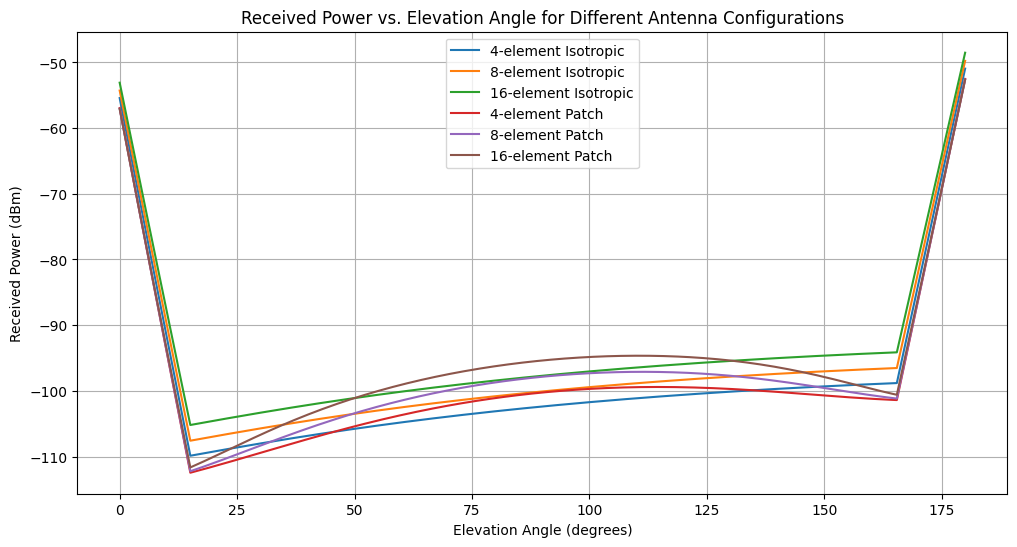

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Constants and previously calculated values (make sure these are available in the script)
EIRP_dBW = 40
elevation_angles=np.linspace(0,180,360)

def received_power_dBm(EIRP_dBW, path_loss_dB, gain_dB):
    """Calculate received power in dBm including antenna gain"""
    EIRP_dBm = EIRP_dBW + 30  # Convert from dBW to dBm
    P_rx_dBm = EIRP_dBm - path_loss_dB + gain_dB
    return P_rx_dBm

def moving_average(data, window_size):
    window = np.ones(int(window_size)) / float(window_size)
    return np.convolve(data, window, 'same')

def plot_received_power_for_antennas(elevation_angles, path_losses, G_values_dict, antenna_types, element_counts, window_size):
    plt.figure(figsize=(12, 6))
    samples_per_degree = len(elevation_angles) / (elevation_angles[-1] - elevation_angles[0])
    moving_window_size = int(window_size * samples_per_degree)
    # Loop through antenna types and element counts
    for antenna_type in antenna_types:
        for N in element_counts:
            # Fetch the gain in dB for the specific antenna configuration
            gains_dB = 10 * np.log10(G_values_dict[antenna_type][int(N)])
            
            # Calculate received power for each path loss and corresponding gain
            received_powers_dBm = [received_power_dBm(EIRP_dBW, pl, gd) for pl, gd in zip(path_losses, gains_dB)]
            received_powers_dBm_avg = moving_average(received_powers_dBm, moving_window_size)
            # Plotting
            plt.plot(elevation_angles, received_powers_dBm_avg, label=f'{N}-element {antenna_type.capitalize()}')

    plt.xlabel('Elevation Angle (degrees)')
    plt.ylabel('Received Power (dBm)')
    plt.title('Received Power vs. Elevation Angle for Different Antenna Configurations')
    plt.grid(True)
    plt.legend()
    plt.show()

# Example call to plot function
# Make sure 'G_values_dict', 'elevation_angles', and 'path_losses' are correctly defined and accessible here.
plot_received_power_for_antennas(elevation_angles, path_losses, G_values_dict, ['isotropic', 'patch'], [4, 8, 16], 30)

received_powers_with_gain = {ant_type: {elem_count: [] for elem_count in [4,8,16]} for ant_type in antenna_types}

for antenna_type in antenna_types:
    for N in [4,8,16]:
        # Fetch the gain in dB for the specific antenna configuration
        gains_dB = 10 * np.log10(G_values_dict[antenna_type][int(N)])
        
        # Calculate received power for each path loss and corresponding gain
        received_powers_dBm = [received_power_dBm(EIRP_dBW, pl, gd) for pl, gd in zip(path_losses, gains_dB)]
        received_powers_dBm_avg = moving_average(received_powers_dBm, 30)
        
        # Store the received power values
        received_powers_with_gain[antenna_type][N] = received_powers_dBm_avg
        
        # Optional plotting of received power (comment out if not needed)
        # plt.plot(elevation_angles, received_powers_dBm_avg, label=f'{N}-element {antenna_type.capitalize()}')

# plt.xlabel('Elevation Angle (degrees)')
# plt.ylabel('Received Power (dBm)')
# plt.title('Received Power vs. Elevation Angle for Different Antenna Configurations')
# plt.grid(True)
# plt.legend()
# plt.show()

lets compute the SNR

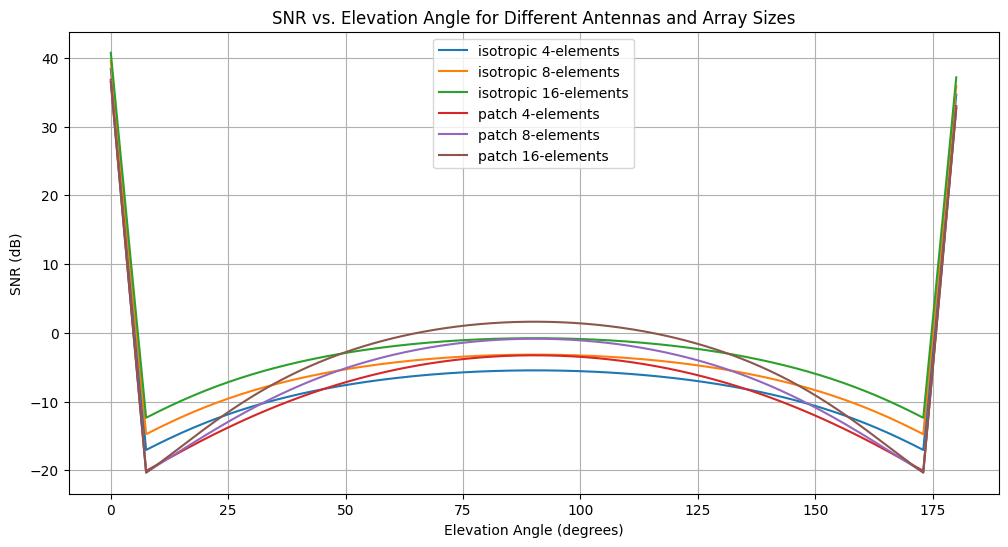

In [26]:
def dBm_to_Watts(dBm):
    """Convert dBm to Watts"""
    return 10 ** ((dBm - 30) / 10)

def calculate_SNR(received_powers_dBm, system_temperature, bandwidth, noise_figure):
    """Calculate the SNR for an array of received power values."""
    # Convert received power from dBm to Watts
    received_power_W = np.array([dBm_to_Watts(p) for p in received_powers_dBm])
    # Calculate noise power in Watts
    noise_power_W = k_B * system_temperature * bandwidth * noise_figure
    # Calculate SNR
    SNR_linear = received_power_W / noise_power_W
    # Convert SNR to dB
    SNR_dB = 10 * np.log10(SNR_linear)
    return SNR_dB

SNR_values = {ant_type: {elem_count: [] for elem_count in [4,8,16]} for ant_type in antenna_types}

for antenna_type in antenna_types:
    for element_count in [4,8,16]:
        # Retrieve the stored received power values
        received_powers_dBm = received_powers_with_gain[antenna_type][element_count]
        # Calculate SNR
        SNR_values[antenna_type][element_count] = calculate_SNR(received_powers_dBm, system_temperature_K, bandwidth_Hz, noise_figure_dB)

# Plotting the SNR vs Elevation Angle for different antenna configurations
plt.figure(figsize=(12, 6))
for antenna_type in antenna_types:
    for element_count in [4,8,16]:
        plt.plot(elevation_angles, SNR_values[antenna_type][element_count], label=f'{antenna_type} {element_count}-elements')
plt.xlabel('Elevation Angle (degrees)')
plt.ylabel('SNR (dB)')
plt.title('SNR vs. Elevation Angle for Different Antennas and Array Sizes')
plt.grid(True)
plt.legend()
plt.show()


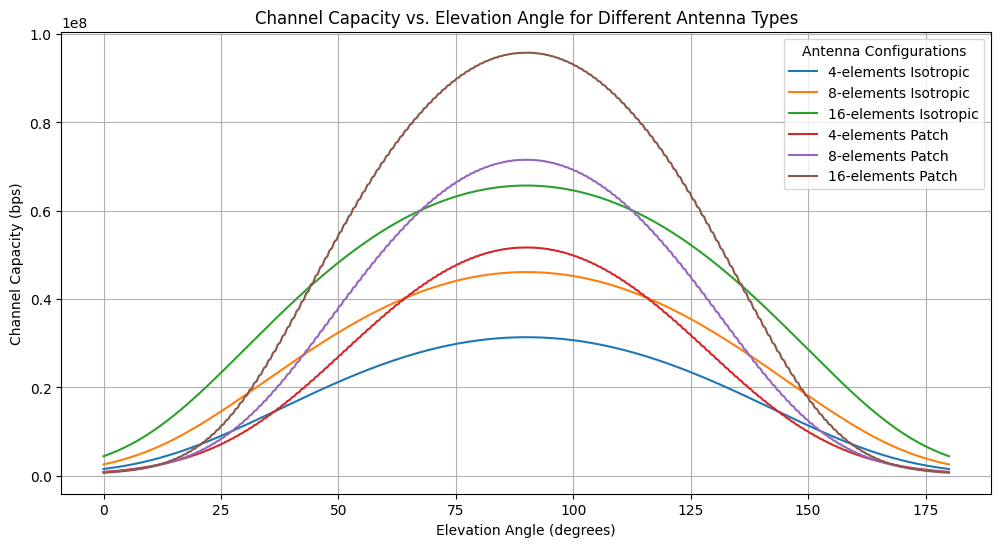

Total transmitted data for isotropic 4-element array: 6040.829079693116 MB
Total transmitted data for isotropic 8-element array: 9153.124222701146 MB
Total transmitted data for isotropic 16-element array: 13552.921637222284 MB
Total transmitted data for patch 4-element array: 8224.402662176468 MB
Total transmitted data for patch 8-element array: 11306.059255224309 MB
Total transmitted data for patch 16-element array: 15536.20633542136 MB


In [98]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
R_E = 6371e3  # Earth radius in meters
h_s = 500e3   # Satellite altitude in meters
T_rev = 5668  # Orbital period in seconds
B = 40e6      # Bandwidth in Hz

def snr_db_to_linear(snr_db):
    """Convert SNR from dB to linear scale."""
    return 10 ** (snr_db / 10)

# Initializing dictionaries for storing results
channel_capacities = {antenna_type: {N: None for N in SNR_values[antenna_type]} for antenna_type in SNR_values}
total_transmitted_data = {antenna_type: {N: None for N in SNR_values[antenna_type]} for antenna_type in SNR_values}

# Calculate channel capacities
plt.figure(figsize=(12, 6))  # Ensure the figure is initialized before plotting
for antenna_type in SNR_values:
    for element_count in SNR_values[antenna_type]:
        snr_linear = snr_db_to_linear(SNR_values[antenna_type][element_count])
        channel_capacity = B * np.log2(1 + snr_linear)
        channel_capacities[antenna_type][element_count] = channel_capacity

        # Plot channel capacity with specific label
        plt.plot(elevation_angles, channel_capacity, label=f'{element_count}-elements {antenna_type.capitalize()}')

plt.xlabel('Elevation Angle (degrees)')
plt.ylabel('Channel Capacity (bps)')
plt.title('Channel Capacity vs. Elevation Angle for Different Antenna Types')
plt.legend(title="Antenna Configurations")
plt.grid(True)
plt.show()

# Calculate the total transmitted data in one pass
for antenna_type in channel_capacities:
    for element_count in channel_capacities[antenna_type]:
        capacities = np.array(channel_capacities[antenna_type][element_count])
        elevation_angles_rad = np.radians(elevation_angles)
        delta_alphas = np.diff(elevation_angles_rad)
        delta_tn = T_rev * delta_alphas / (2 * np.pi)
        avg_capacities = (capacities[:-1] + capacities[1:]) / 2
        total_data = np.sum(avg_capacities * delta_tn)
        total_transmitted_data[antenna_type][element_count] = total_data
        print(f"Total transmitted data for {antenna_type} {element_count}-element array: {total_data / (8 * 1024**2)} MB")


lets move on to the NLOS geometry problem. 
we first define the geometry of the scene based on the schematic provided in project materials

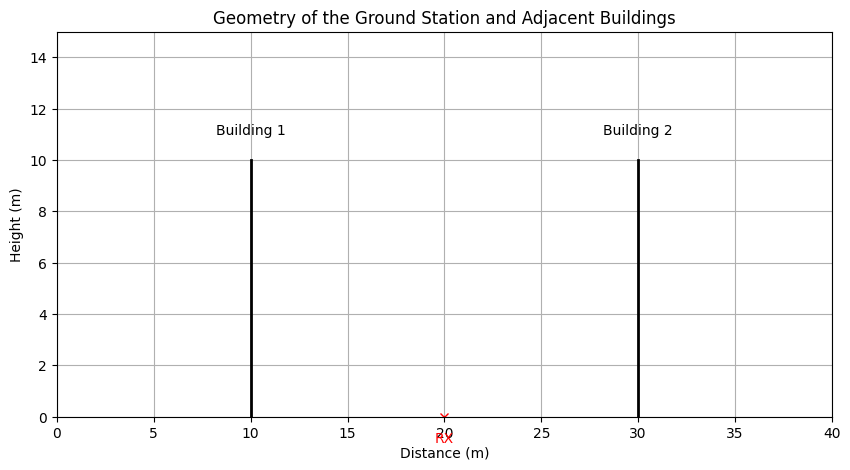

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Given values
building_height = 10  # in meters
ground_station_to_building = 10  # distance from the ground station to the nearest building in meters
building_to_building = 20  # distance between the two buildings in meters

# Plotting the geometry of the scenario
fig, ax = plt.subplots(figsize=(10, 5))

# Buildings
ax.plot([ground_station_to_building, ground_station_to_building], [0, building_height], 'k-', lw=2)
ax.plot([ground_station_to_building + building_to_building, ground_station_to_building + building_to_building], [0, building_height], 'k-', lw=2)

# Ground station (RX)
ax.plot(ground_station_to_building + building_to_building / 2, 0, 'rx')  # RX position

# Labels and text
ax.text(ground_station_to_building + building_to_building / 2, -1, 'RX', horizontalalignment='center', color='red')
ax.text(ground_station_to_building, building_height + 1, 'Building 1', horizontalalignment='center')
ax.text(ground_station_to_building + building_to_building, building_height + 1, 'Building 2', horizontalalignment='center')

# Axes limits and labels
ax.set_xlim(0, ground_station_to_building * 2 + building_to_building)
ax.set_ylim(0, building_height + 5)
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Height (m)')

# Title and grid
ax.set_title('Geometry of the Ground Station and Adjacent Buildings')
ax.grid(True)

# Show plot
plt.show()


FREE SPACE DISTANCES TX-RX

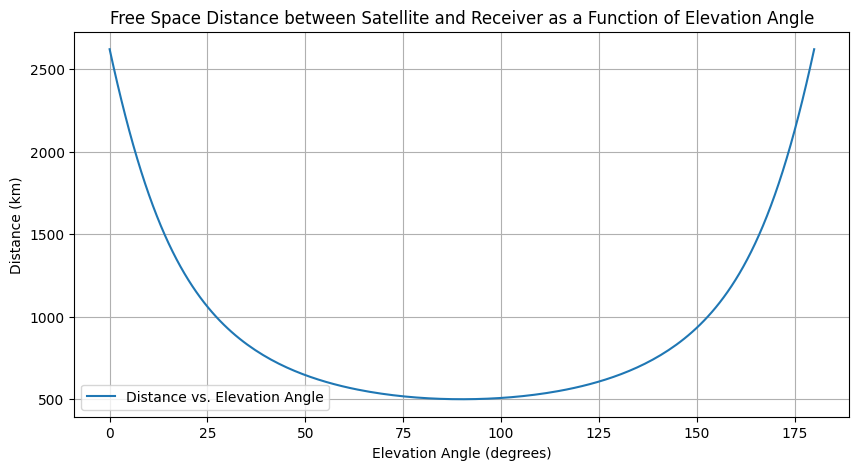

(2573.130389234094, 6871)


In [122]:
import numpy as np
import math
import matplotlib.pyplot as plt

def satellite_position(elevation_angle_degrees, observer_position=(0, 6371)):
    # Constants
    satellite_altitude = 500  # km, above sea level
    earth_radius = 6371       # km
    elevation_angle_radians = math.radians(elevation_angle_degrees)
    
    d = math.sqrt((earth_radius + satellite_altitude)**2 - (earth_radius * math.cos(elevation_angle_radians))**2)
    d -= earth_radius * math.sin(elevation_angle_radians)
    
    x = d * math.cos(elevation_angle_radians)
    y = earth_radius + satellite_altitude  # altitude from the center of the Earth

    return x, y

def distance_between_points(x1, y1, x2, y2):
    # Calculate Euclidean distance between two points
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2 )

def plot_and_store_satellite_distances():
    elevation_angles = np.linspace(0, 180, 180)  # from 0 to 180 degrees with 360 points
    distances = []

    receiver_x, receiver_y = 0, 6371  # Receiver at the origin on the Earth's surface

    for angle in elevation_angles:
        sat_x, sat_y = satellite_position(angle)
        dist = distance_between_points(receiver_x, receiver_y, sat_x, sat_y)
        distances.append(dist)

    plt.figure(figsize=(10, 5))
    plt.plot(elevation_angles, distances, label='Distance vs. Elevation Angle')
    plt.xlabel('Elevation Angle (degrees)')
    plt.ylabel('Distance (km)')
    plt.title('Free Space Distance between Satellite and Receiver as a Function of Elevation Angle')
    plt.grid(True)
    plt.legend()
    plt.show()

    return elevation_angles, distances

# Execute the function and store the distances
angles, tx_rx_dists_freespace = plot_and_store_satellite_distances()
print(satellite_position(0))

FREE SPACE PATH LOSSES

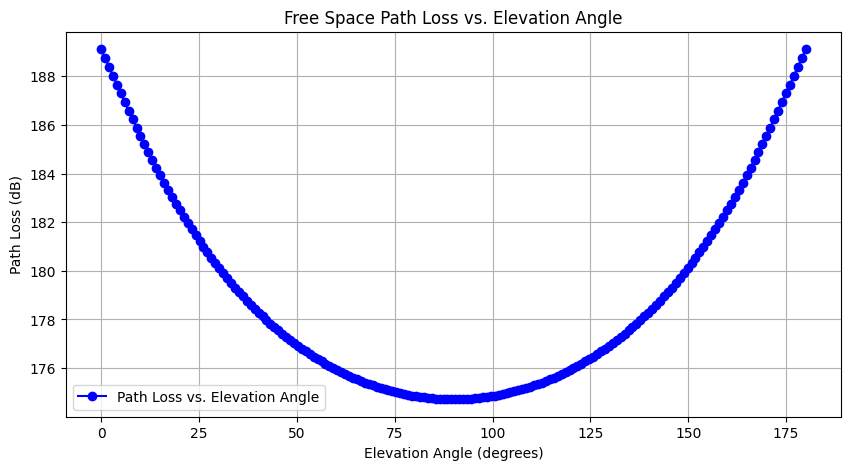

In [123]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
c = 3e8  # Speed of light in m/s
frequency = 26e9  # Frequency in Hz for example, assuming 26 GHz

def free_space_path_loss(d, f=frequency):
    # Convert distance from km to meters
    d = d * 1e3
    # Calculate the wavelength
    wavelength = c / f
    # Calculate the path loss in dB
    path_loss = 20 * np.log10((4 * np.pi * d / wavelength))
    return path_loss

def plot_path_loss_vs_elevation(angles, distances):
    # Calculate path losses for each distance
    path_losses = [free_space_path_loss(d) if d < np.inf else np.inf for d in distances]

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.plot(angles, path_losses, marker='o', linestyle='-', color='b', label='Path Loss vs. Elevation Angle')
    plt.xlabel('Elevation Angle (degrees)')
    plt.ylabel('Path Loss (dB)')
    plt.title('Free Space Path Loss vs. Elevation Angle')
    plt.grid(True)
    plt.legend()
    plt.show()

    return path_losses


# Get path losses for each elevation angle
path_losses_free_space = plot_path_loss_vs_elevation(angles, tx_rx_dists_freespace)

# Now you have path_losses array, you can use it for further processing if needed.


now, lets see for which elev angles we have LOS (should be between 45 and 135 intuitively)

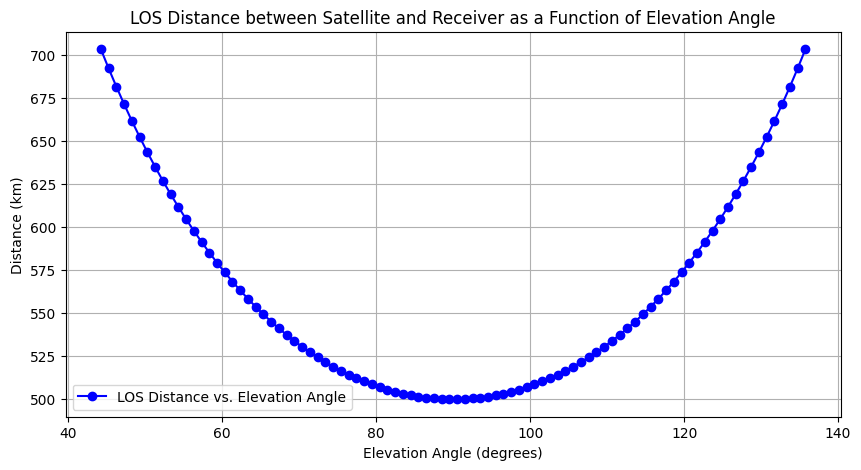

In [124]:
import numpy as np
import math
import matplotlib.pyplot as plt

def satellite_position(elevation_angle_degrees, observer_position=(0, 6371)):
    satellite_altitude = 500  # km, above sea level
    earth_radius = 6371       # km
    elevation_angle_radians = math.radians(elevation_angle_degrees)
    d = math.sqrt((earth_radius + satellite_altitude)**2 - (earth_radius * math.cos(elevation_angle_radians))**2)
    d -= earth_radius * math.sin(elevation_angle_radians)
    x = d * math.cos(elevation_angle_radians)
    y = earth_radius + satellite_altitude
    return x, y

def distance_between_points(x1, y1, x2, y2):
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

def check_los_possibility(x_satellite, y_satellite, observer_x, observer_y, check_point_x):
    if x_satellite != observer_x:
        slope = (y_satellite - observer_y) / (x_satellite - observer_x)
        y_intersect = slope * (check_point_x - x_satellite) + y_satellite
        return y_intersect > observer_y + 0.01  # Ensuring the path is above the observer by 10m
    return False

def prepare_los_distances():
    elevation_angles = np.linspace(0, 180, 180)  # from 0 to 180 degrees
    LOS_distances = np.full(len(elevation_angles), np.inf)  # Initialize with infinity for all angles

    receiver_x, receiver_y = 0, 6371  # Receiver at the origin on the Earth's surface

    for i, angle in enumerate(elevation_angles):
        sat_x, sat_y = satellite_position(angle)
        check_point_x = 0.01 if sat_x > 0 else -0.01
        if check_los_possibility(sat_x, sat_y, receiver_x, receiver_y, check_point_x):
            LOS_distances[i] = distance_between_points(receiver_x, receiver_y, sat_x, sat_y)

    return elevation_angles, LOS_distances

def plot_satellite_distance(elevation_angles, LOS_distances):
    plt.figure(figsize=(10, 5))
    plt.plot(elevation_angles, LOS_distances, marker='o', linestyle='-', color='blue', label='LOS Distance vs. Elevation Angle')
    plt.xlabel('Elevation Angle (degrees)')
    plt.ylabel('Distance (km)')
    plt.title('LOS Distance between Satellite and Receiver as a Function of Elevation Angle')
    plt.grid(True)
    plt.legend()
    plt.show()

# Prepare data
angles, los_distances = prepare_los_distances()

# Plot the data
plot_satellite_distance(angles, los_distances)


lets plot the path losses for LOS, so that later we can calculate received power for direct, LOS paths

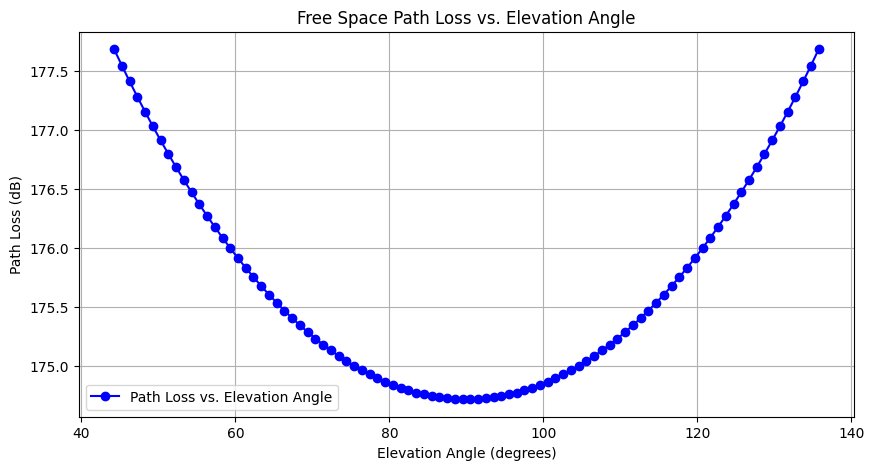

In [125]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
c = 3e8  # Speed of light in m/s
frequency = 26e9  # Frequency in Hz for example, assuming 26 GHz

def free_space_path_loss(d, f=frequency):
    # Convert distance from km to meters
    d = d * 1e3
    # Calculate the wavelength
    wavelength = c / f
    # Calculate the path loss in dB
    path_loss = 20 * np.log10((4 * np.pi * d / wavelength))
    return path_loss

def plot_path_loss_vs_elevation(angles, distances):
    # Calculate path losses for each distance
    path_losses = [free_space_path_loss(d) if d < np.inf else np.inf for d in distances]

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.plot(angles, path_losses, marker='o', linestyle='-', color='b', label='Path Loss vs. Elevation Angle')
    plt.xlabel('Elevation Angle (degrees)')
    plt.ylabel('Path Loss (dB)')
    plt.title('Free Space Path Loss vs. Elevation Angle')
    plt.grid(True)
    plt.legend()
    plt.show()

    return path_losses

# Assuming you have already obtained angles and los_distances from prepare_los_distances()
angles, los_distances = prepare_los_distances()  # Example call, replace with actual data retrieval if already done

# Get path losses for each elevation angle
path_losses_LOS = plot_path_loss_vs_elevation(angles, los_distances)

# Now you have path_losses array, you can use it for further processing if needed.


In [ ]:
print("free space path losses:", tx_rx_dists_freespace)
print("free space tx-rx Distances:", tx_rx_dists_freespace)
print("Angles:", angles)
print("Lengths: LOS - {}, Distances - {}, Angles - {}".format(len(path_losses_LOS), len(los_distances), len(angles)))


free space path losses: [2621.2592393733207, 2513.600042036282, 2410.219337401733, 2311.1916917552003, 2216.5509361607183, 2126.292611112111, 2040.377226752584, 1958.7341398573508, 1881.2658306912376, 1807.8523646452554, 1738.3558421624064, 1672.6246711704664, 1610.4975337425687, 1551.8069580362826, 1496.3824437176236, 1444.053121323488, 1394.6499518873711, 1348.0074922573374, 1303.965264264836, 1262.368773133264, 1223.0702233438328, 1185.9289797275765, 1150.8118188530777, 1117.5930116923519, 1086.1542737488599, 1056.3846138201661, 1028.180107685246, 1001.4436184688446, 976.0844813620321, 952.0181668189739, 929.1659333074404, 907.4544781373666, 886.8155927833277, 867.185827400828, 848.5061678587136, 830.7217275187184, 813.7814551403894, 797.6378596329181, 782.246751877938, 767.5670034778458, 753.5603220164098, 740.1910422307394, 727.4259323683302, 715.2340149255433, 703.5864009230256, 692.4561368600712, 681.8180634964556, 671.6486856312808, 661.9260520793547, 652.6296450832524, 643.740

lets see for which elev angles we have reflection: so if sattellite's x position is >0 (in the right side) we will consider the reflection with the left wall if its possible or not: if the path between satellite's (x,y) and the point situated at (-20, R_e), evaluated at x=-10 (where the left wall is), has a value between R_e and R_e+10, then we have reflection. if the satellite's x position is <0 (satellite left of receiver), we consider reflection with right wall if its possible or not: if path between satellite's (x,y) and the point situated at (20,R_e), evaluated at x=10 (where right wall is), has  a value between R_e and R_e+10, then we have reflection. . 
when we check for possibility of reflection, we should add an extra condition. not only the path has to intersect the wall opposite to our side at a height between 0 and 10 meters, but also the path has to be above the wall thats on the same side as the satellite. therefore, the condition should include that, when the satellite is on right (x>0), the path between satellite and (-0.02,R_e), evaluated at x=-0.01, should be above 0.01 in order to have reflection (otherwise the line is blocked). if satellite is on left (x<0), path between satellite and (0.02, R_e), evaluated at x=0.01, should be above 0.01 to have reflection.

In [126]:
import math

def satellite_position(elevation_angle_degrees, observer_position=(0, 6371)):
    # Constants
    satellite_altitude = 500  # km, above sea level
    earth_radius = 6371       # km

    # Convert elevation angle from degrees to radians
    elevation_angle_radians = math.radians(elevation_angle_degrees)
    
    # Observer coordinates
    observer_x, observer_y = observer_position
    print("observer position:" , observer_position)
    # Calculate satellite position based on elevation angle
    # Calculate the distance 'd' from the observer directly to the satellite
    d = math.sqrt((earth_radius + satellite_altitude)**2 - (earth_radius * math.cos(elevation_angle_radians))**2)
    d -= earth_radius * math.sin(elevation_angle_radians)

    print("d = math.sqrt((earth_radius + satellite_altitude)**2 - (earth_radius * math.cos(elevation_angle_radians))**2); d -= earth_radius * math.sin(elevation_angle_radians)")
    print("therefore direct distance between receiver and satellite is ", d)
    # Calculate the x, y positions of the satellite relative to the observer
    x = observer_x + d * math.cos(elevation_angle_radians)
    print("x satellite: ( observer_x + d * math.cos(elevation_angle_radians)) =  ", x)
    
    y = d * math.sin(elevation_angle_radians)  # apparent height from the observer's perspective
    print("y satellite: y = d * math.sin(elevation_angle_radians) =  ", y)
    return x, y

def check_reflection_possibility(x_satellite, y_satellite, target_x, wall_x, same_side_wall_x, earth_radius):
    """ Determine if a reflection is possible by evaluating the line from the satellite to a target point. """
    if x_satellite != target_x:
        # Calculate the slope of the line from the satellite to the target point
        slope = (y_satellite) / (x_satellite - target_x)
        print(" slope = (y_satellite) / (x_satellite - target_x)")
        print("therefore, slope=", slope)
        # Calculate the y-coordinate where the line crosses the wall's x-coordinate
        y_intersect_opposite_wall = slope * (wall_x - x_satellite) + y_satellite
        print("y_intersect_opposite_wall = slope * (wall_x - x_satellite) + y_satellite")
        print("the path intersects the opposite wall at a height of", (y_intersect_opposite_wall)*1e3, " m")
        # Check if this intersection y-coordinate is within 10 meters above the Earth's radius
        if 0 <= y_intersect_opposite_wall <= 0 + 0.01:
            # Additional check for the wall on the same side
            y_intersect_same_side_wall = slope * (same_side_wall_x - x_satellite) + y_satellite
            print("and passes over/intersects the same-sided wall at", (y_intersect_same_side_wall)*1e3, " m")
            return y_intersect_same_side_wall >   0.01
    return False

# Constants
earth_radius = 6371  # km
right_wall_x = 0.01    # m
left_wall_x = -0.01    # m
right_target_x = 0.02  # m
left_target_x = -0.02  # m

# Check reflection possibility across a range of angles
for angle in range(19, 22, 1):
    print("at angle ", angle, " we have the follwoing calculations :")
    x_sat, y_sat = satellite_position(angle)
    
  
    if x_sat > 0:  # Satellite is in the right half
        if check_reflection_possibility(x_sat, y_sat, left_target_x, left_wall_x, right_wall_x, earth_radius):
            
            print(f"Reflection possible at {angle}° with the left wall.")
        else:
            print(f"No reflection at {angle}° with the left wall.")
    elif x_sat < 0:  # Satellite is in the left half
        if check_reflection_possibility(x_sat, y_sat, right_target_x, right_wall_x, left_wall_x, earth_radius):
            print(f"Reflection possible at {angle}° with the right wall.")
        else:
            print(f"No reflection at {angle}° with the right wall.")
    print(" ")


at angle  19  we have the follwoing calculations :
observer position: (0, 6371)
d = math.sqrt((earth_radius + satellite_altitude)**2 - (earth_radius * math.cos(elevation_angle_radians))**2); d -= earth_radius * math.sin(elevation_angle_radians)
therefore direct distance between receiver and satellite is  1230.844425918669
x satellite: ( observer_x + d * math.cos(elevation_angle_radians)) =   1163.7862683789788
y satellite: y = d * math.sin(elevation_angle_radians) =   400.7237481702196
 slope = (y_satellite) / (x_satellite - target_x)
therefore, slope= 0.34432169602280316
y_intersect_opposite_wall = slope * (wall_x - x_satellite) + y_satellite
the path intersects the opposite wall at a height of 3.4432169602496288  m
and passes over/intersects the same-sided wall at 10.329650880692043  m
Reflection possible at 19° with the left wall.
 
at angle  20  we have the follwoing calculations :
observer position: (0, 6371)
d = math.sqrt((earth_radius + satellite_altitude)**2 - (earth_radius * m

we have reflection at angles 13-43 degrees and then on the opposite side, between 137 degrees and 167 degrees. now, lets store the lengths of the reflected paths (where they exist), and plot them w elev angle

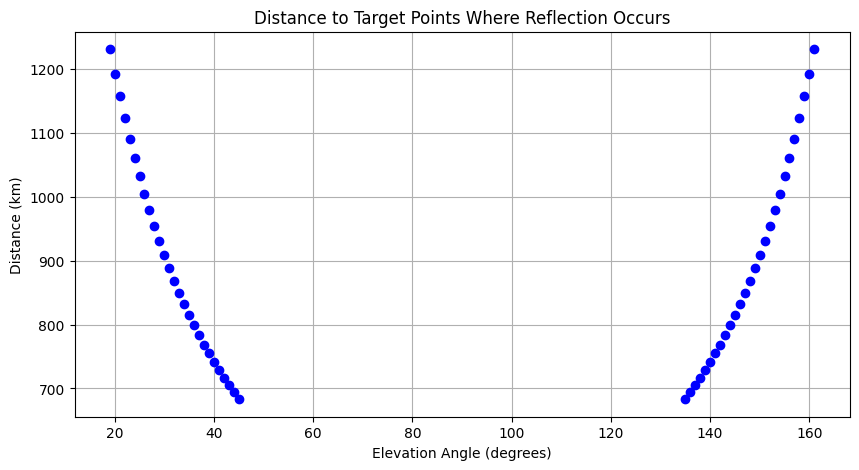

In [127]:
import math
import matplotlib.pyplot as plt
import numpy as np  # make sure numpy is imported

def satellite_position(elevation_angle_degrees, observer_position=(0, 6371)):
    satellite_altitude = 500  # km
    earth_radius = 6371       # km
    elevation_angle_radians = math.radians(elevation_angle_degrees)
    d = math.sqrt((earth_radius + satellite_altitude)**2 - (earth_radius * math.cos(elevation_angle_radians))**2)
    d -= earth_radius * math.sin(elevation_angle_radians)
    x = d * math.cos(elevation_angle_radians)
    y = d * math.sin(elevation_angle_radians)
    return x, y

def distance_between_points(x1, y1, x2, y2):
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

def check_reflection_possibility(x_satellite, y_satellite, target_x, wall_x, same_side_wall_x, earth_radius):
    if x_satellite != target_x:
        slope = (y_satellite) / (x_satellite - target_x)
        y_intersect_opposite_wall = slope * (wall_x - x_satellite) + y_satellite

        if 0 <= y_intersect_opposite_wall <= 0.01:
            y_intersect_same_side_wall = slope * (same_side_wall_x - x_satellite) + y_satellite
            if y_intersect_same_side_wall > 0.01:
                return distance_between_points(x_satellite, y_satellite, target_x, 0)
    return np.inf

def prepare_reflection_distances():
    earth_radius = 6371  # km
    right_wall_x = 0.01  # km
    left_wall_x = -0.01  # km
    right_target_x = 0.02  # km
    left_target_x = -0.02  # km
    reflected_path_distances = []

    for angle in range(0, 180, 1):
        x_sat, y_sat = satellite_position(angle)
        if x_sat > 0:
            distance = check_reflection_possibility(x_sat, y_sat, left_target_x, left_wall_x, right_wall_x, earth_radius)
        else:
            distance = check_reflection_possibility(x_sat, y_sat, right_target_x, right_wall_x, left_wall_x, earth_radius)
        reflected_path_distances.append(distance)

    return np.arange(0, 180, 1), reflected_path_distances

def plot_reflection_distances(angles, reflected_path_distances):
    plt.figure(figsize=(10, 5))
    plt.plot(angles, reflected_path_distances, marker='o', linestyle=' ', color='b')
    plt.title('Distance to Target Points Where Reflection Occurs')
    plt.xlabel('Elevation Angle (degrees)')
    plt.ylabel('Distance (km)')
    plt.grid(True)
    plt.show()

# Prepare data
angles, reflected_path_distances = prepare_reflection_distances()

# Plot the reflection distances
plot_reflection_distances(angles, reflected_path_distances)


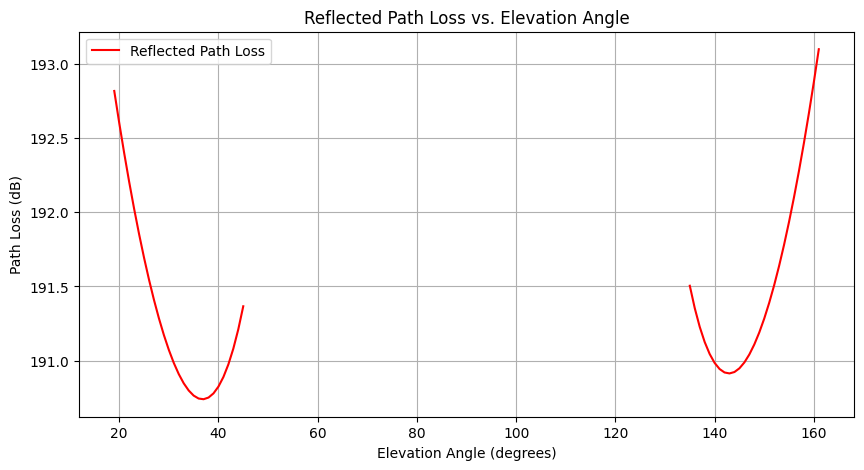

In [130]:
import math
import numpy as np
import matplotlib.pyplot as plt

def calculate_reflection_coefficient(theta_degrees, epsilon_r=4):
    theta = math.radians(theta_degrees)
    cos_theta = math.cos(theta)
    sin_theta_squared = math.sin(theta)**2
    if epsilon_r > sin_theta_squared:  # Check to avoid negative sqrt
        sqrt_part = math.sqrt(epsilon_r - sin_theta_squared)
        Gamma = (epsilon_r * cos_theta - sqrt_part) / (epsilon_r * cos_theta + sqrt_part)
        return abs(Gamma)
    return 0  # Return a small but non-zero Gamma if conditions fail

def reflected_path_loss(precomputed_losses_LOS, distances, angles, f=2.6e9):
    c = 3e8  # Speed of light in m/s
    losses = np.full(len(angles), np.inf)  # Initialize all losses to inf
    idx_reflected = 0  # Index for reflected distances and angles

    for i, angle in enumerate(angles):
        if idx_reflected < len(distances) and angle == angles[idx_reflected]:
            d = distances[idx_reflected]
            los_loss = precomputed_losses_LOS[i]
            if d == np.inf or los_loss == np.inf:
                losses[i] = np.inf
            else:
                incidence_angle = angle if angle > 90 else 180 - angle
                Gamma = calculate_reflection_coefficient(incidence_angle)
                if Gamma == 0:
                    Gamma = 0.001  # Avoid log of zero
                reflected_loss = los_loss + 20 * np.log10(Gamma)
                losses[i] = reflected_loss
            idx_reflected += 1
        else:
            losses[i] = np.inf  # No reflection data available for this angle

    return losses

# Example range of all possible angles
angles = np.arange(0, 180, 1)

# Use the precomputed path losses and distances for the reflected path loss calculation
reflected_losses = reflected_path_loss(path_losses_free_space, reflected_path_distances, angles)
plt.figure(figsize=(10, 5))
plt.plot(angles, reflected_losses, 'r-', label='Reflected Path Loss')
plt.xlabel('Elevation Angle (degrees)')
plt.ylabel('Path Loss (dB)')
plt.title('Reflected Path Loss vs. Elevation Angle')
plt.legend()
plt.grid(True)
plt.show()


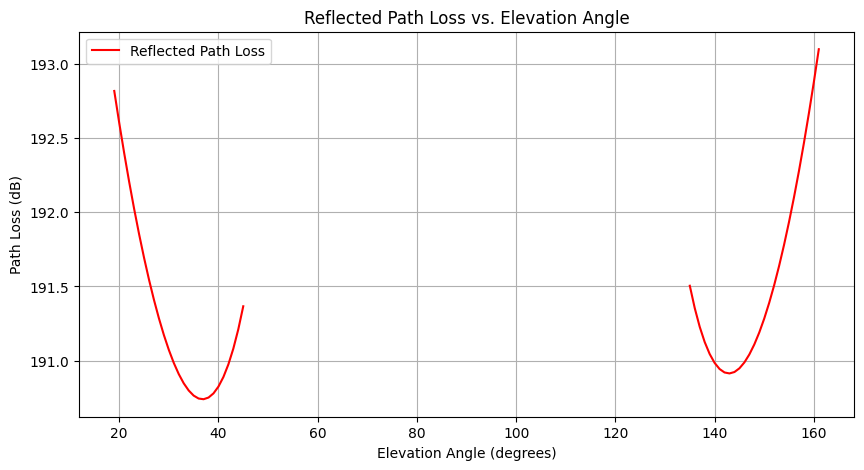

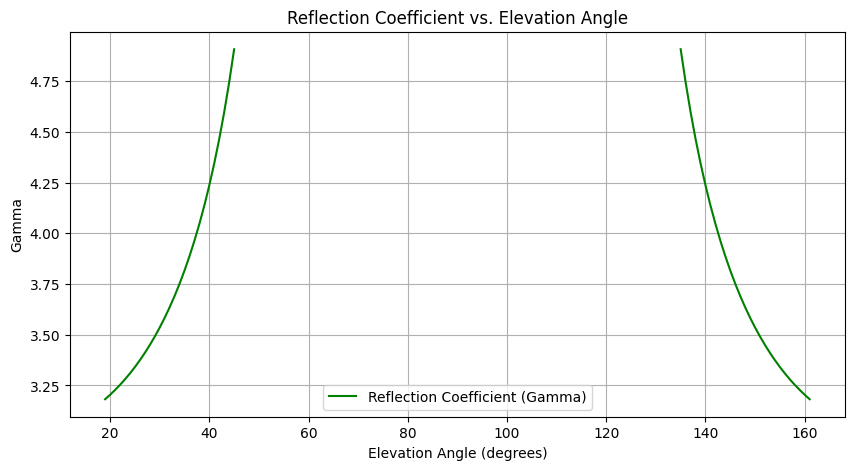

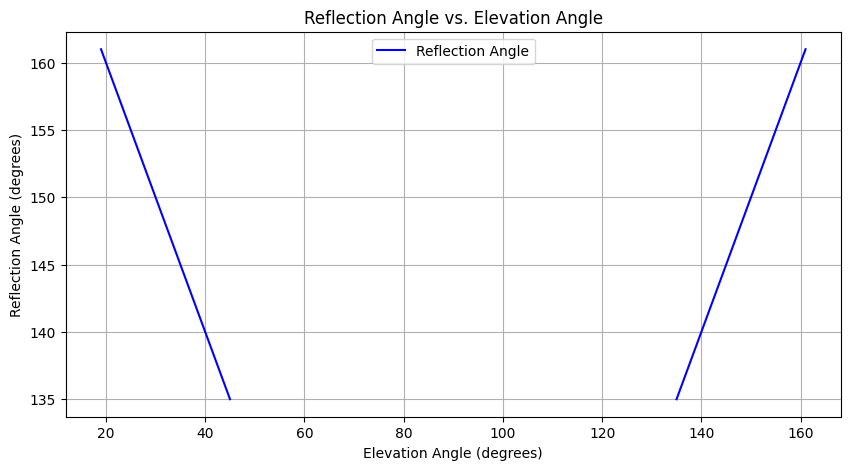

In [132]:
import math
import numpy as np
import matplotlib.pyplot as plt

def calculate_reflection_coefficient(theta_degrees, epsilon_r=4):
    theta = math.radians(theta_degrees)
    cos_theta = math.cos(theta)
    sin_theta_squared = math.sin(theta)**2
    if epsilon_r > sin_theta_squared:  # Check to avoid negative sqrt
        sqrt_part = math.sqrt(epsilon_r - sin_theta_squared)
        Gamma = (epsilon_r * cos_theta - sqrt_part) / (epsilon_r * cos_theta + sqrt_part)
        return abs(Gamma)
    return 0  # Return a small but non-zero Gamma if conditions fail

def reflected_path_loss_and_gamma(precomputed_losses_LOS, distances, angles, f=2.6e9):
    c = 3e8  # Speed of light in m/s
    losses = np.full(len(angles), np.inf)  # Initialize all losses to inf
    gammas = np.full(len(angles), np.inf)
    reflection_angles = np.full(len(angles), np.inf)
    idx_reflected = 0  # Index for reflected distances and angles

    for i, angle in enumerate(angles):
        if idx_reflected < len(distances) and angle == angles[idx_reflected]:
            d = distances[idx_reflected]
            los_loss = precomputed_losses_LOS[i]
            if d == np.inf or los_loss == np.inf:
                losses[i] = np.inf
                gammas[i] = np.inf
                reflection_angles[i] = np.inf
            else:
                incidence_angle = angle if angle > 90 else 180 - angle
                Gamma = calculate_reflection_coefficient(incidence_angle)
                if Gamma == 0:
                    Gamma = 0.001  # Avoid log of zero
                reflected_loss = los_loss + 20 * np.log10(Gamma)
                losses[i] = reflected_loss
                gammas[i] = Gamma
                reflection_angles[i] = incidence_angle
            idx_reflected += 1
        else:
            losses[i] = np.inf  # No reflection data available for this angle
            gammas[i] = np.inf
            reflection_angles[i] = np.inf

    return losses, gammas, reflection_angles

# Example range of all possible angles
angles = np.arange(0, 180, 1)

# Use the precomputed path losses and distances for the reflected path loss calculation
reflected_losses, gamma_values, reflection_angles = reflected_path_loss_and_gamma(path_losses_free_space, reflected_path_distances, angles)

# Plot the reflected path loss
plt.figure(figsize=(10, 5))
plt.plot(angles, reflected_losses, 'r-', label='Reflected Path Loss')
plt.xlabel('Elevation Angle (degrees)')
plt.ylabel('Path Loss (dB)')
plt.title('Reflected Path Loss vs. Elevation Angle')
plt.legend()
plt.grid(True)
plt.show()

# Plot the Gamma values
plt.figure(figsize=(10, 5))
plt.plot(angles, gamma_values, 'g-', label='Reflection Coefficient (Gamma)')
plt.xlabel('Elevation Angle (degrees)')
plt.ylabel('Gamma')
plt.title('Reflection Coefficient vs. Elevation Angle')
plt.legend()
plt.grid(True)
plt.show()

# Plot the reflection angles
plt.figure(figsize=(10, 5))
plt.plot(angles, reflection_angles, 'b-', label='Reflection Angle')
plt.xlabel('Elevation Angle (degrees)')
plt.ylabel('Reflection Angle (degrees)')
plt.title('Reflection Angle vs. Elevation Angle')
plt.legend()
plt.grid(True)
plt.show()


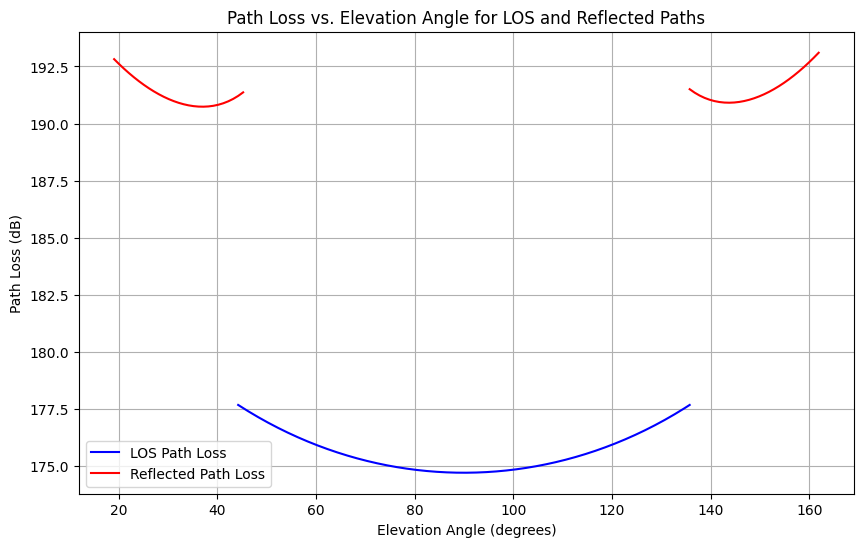

In [131]:
import matplotlib.pyplot as plt
import numpy as np

# Example data setup
angles = np.linspace(0, 180, num=len(path_losses_LOS))  # Adjust if needed based on actual data

# Plotting both LOS and reflected path losses
plt.figure(figsize=(10, 6))
plt.plot(angles, path_losses_LOS, label='LOS Path Loss', color='blue')
plt.plot(angles, reflected_losses, label='Reflected Path Loss', color='red')
plt.xlabel('Elevation Angle (degrees)')
plt.ylabel('Path Loss (dB)')
plt.title('Path Loss vs. Elevation Angle for LOS and Reflected Paths')
plt.legend()
plt.grid(True)
plt.show()


PATH LOSS DUE TO DIFFRACTION PART
---
 there is no need to calculate the fresnel integral, as we were advised by the TA to just use the formulas i have attached. the carrier frequency is 26GHz so im not sure how much of this is actually going to be relevant (maybe just perhaps for the angles that we dont have LOS nor reflection for, which is anywhere between 43 and 45 degrees, there might be something. in any case, what would be the approach here? would we consider that diffraction is possible for all angles, and just take d1 as the distance between the satellite and the top of the right wall (0.01, R_e+0.01) when the x of satellite is >0, or d1 being the distance between the satellite and the top of the left wall (-0.01, R_e+0.01) when x of satellite is <0, and d2 being the distance between the tip of either wall and the receiver? what then, after we determine these distances? we just calculate L_{ke} using the formula 10log|F(\nu)|^2 and thats it

lets calculate the distances d1 and d2 first

In [139]:
import numpy as np
import math

# Constants
R_e = 6371  # Earth's radius in km
satellite_altitude = 500  # km, above sea level
wall_x = 0.01  # Position of the wall in km (10 meters)

def satellite_position(elevation_angle_degrees, observer_position=(0, 6371)):
    satellite_altitude = 500  # km
    earth_radius = 6371       # km
    elevation_angle_radians = math.radians(elevation_angle_degrees)
    d = math.sqrt((earth_radius + satellite_altitude)**2 - (earth_radius * math.cos(elevation_angle_radians))**2)
    d -= earth_radius * math.sin(elevation_angle_radians)
    x = d * math.cos(elevation_angle_radians)
    y = d * math.sin(elevation_angle_radians)
    return x, y

def calculate_distances_d1_d2(elevation_angle):
    x_sat, y_sat = satellite_position(elevation_angle)
    # Distance d1
    d1 = np.abs(x_sat - wall_x) 
    d2 = wall_x  # Perpendicular distance to the wall in km

    return d1, d2

# Example calculation
elevation_angle = 10  # Degrees
d1, d2 = calculate_distances_d1_d2(elevation_angle)
print(f"At {elevation_angle}° elevation angle, d1 = {d1:.3f} km, d2 = {d2:.3f} km")


At 10° elevation angle, d1 = 1668.813 km, d2 = 0.010 km


calculate the knife edge diffraction parameter nu

In [140]:
import numpy as np
import math

# Constants
c = 3e8  # Speed of light in meters per second
frequency = 26e9  # Frequency in Hz (26 GHz for your case)
lambda_wave = c / frequency  # Wavelength
R_e = 6371  # Earth radius in meters
wall_height = 0.01  # Wall height in meters (10 meters above ground level)
satellite_altitude = 500  # Satellite altitude above Earth's surface in meters

def satellite_position(elevation_angle_degrees, observer_position=(0, 6371)):
    satellite_altitude = 500  # km
    earth_radius = 6371       # km
    elevation_angle_radians = math.radians(elevation_angle_degrees)
    d = math.sqrt((earth_radius + satellite_altitude)**2 - (earth_radius * math.cos(elevation_angle_radians))**2)
    d -= earth_radius * math.sin(elevation_angle_radians)
    x = d * math.cos(elevation_angle_radians)
    y = d * math.sin(elevation_angle_radians)
    return x, y

def calculate_distances_d1_d2(elevation_angle):
    """ Calculate distances d1 and d2 based on the elevation angle. """
    x, y = satellite_position(elevation_angle)
    wall_x = 0.01 if x >= 0 else -0.01
    d1 = np.abs(x - wall_x)  # Horizontal distance from the wall
    d2 = 0.01  # Horizontal distance from the wall to the receiver
    print("d1, d2: ", d1, d2)
    return d1, d2

def calculate_nu(elevation_angle):
    """ Calculate the parameter nu for the knife-edge diffraction model. """
    x, y = satellite_position(elevation_angle)
    print("x,y satellite ", x, y)
    h = y - wall_height  # Height difference from the wall to the satellite's path
    print("h: ", h)
    d1, d2 = calculate_distances_d1_d2(elevation_angle)
    nu = h * np.sqrt(2 / lambda_wave * (1 / d1 + 1 / d2))
    return nu

# Example usage
elevation_angle = 10  # degrees
nu = calculate_nu(elevation_angle)
print(f"Value of nu for elevation angle {elevation_angle} degrees is: {nu}")


x,y satellite  1668.8229373934807 294.2585098876241
h:  294.2485098876241
d1, d2:  1668.8129373934808 0.01
Value of nu for elevation angle 10 degrees is: 38739.73252616328


evaluate knife edge loss L_{ke}

Diffraction generally requires that the signal source (in your case, the satellite) and the receiver be on opposite sides of the diffracting obstacle (the wall). If both the source and receiver are on the same side of the obstacle, the standard knife-edge diffraction model isn't appropriate

Wavelength: 1.1538461538461538e-06 m
Elevation angle: 0.0 degrees
Satellite position: x = 2573.130389234094, y = 0.0
Height h: -0.01
Distance d1: 2573.130389253525
Distance d2: 0.01
Nu (mod 2*pi): 131.65637354932272
Elevation angle: 1.005586592178771 degrees
Satellite position: x = 2463.368663299263, y = 8.774947965628588
Height h: 8.764947965628588
Distance d1: 2463.3842565945
Distance d2: 0.01
Nu (mod 2*pi): 115396.13634007148
Elevation angle: 2.011173184357542 degrees
Satellite position: x = 2357.786515862971, y = 17.54719304926238
Height h: 17.537193049262378
Distance d1: 2357.8517356961393
Distance d2: 0.01
Nu (mod 2*pi): 230888.36487313826
Elevation angle: 3.016759776536313 degrees
Satellite position: x = 2256.4589595289044, y = 26.314033201455217
Height h: 26.304033201455216
Distance d1: 2256.6122702407097
Distance d2: 0.01
Nu (mod 2*pi): 346309.45648948883
Elevation angle: 4.022346368715084 degrees
Satellite position: x = 2159.420767843765, y = 35.07276803760182
Height h: 35.06

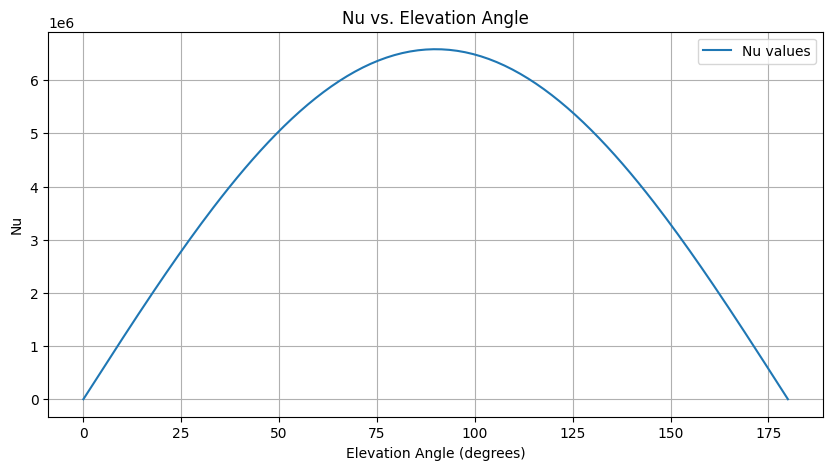

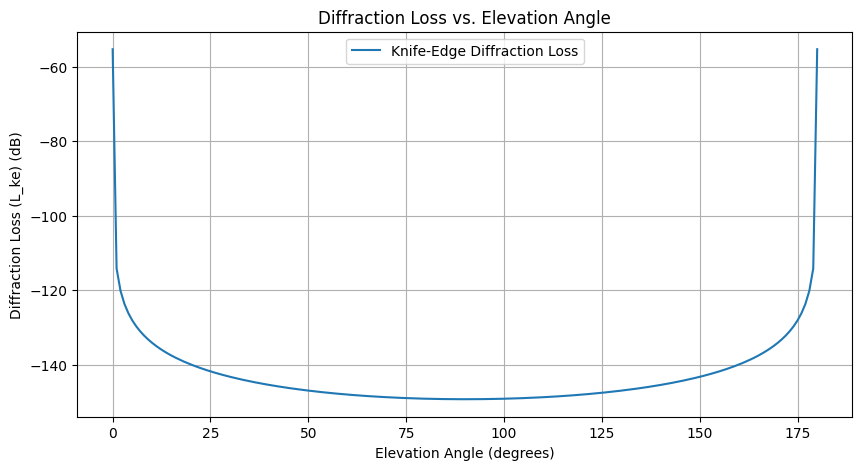

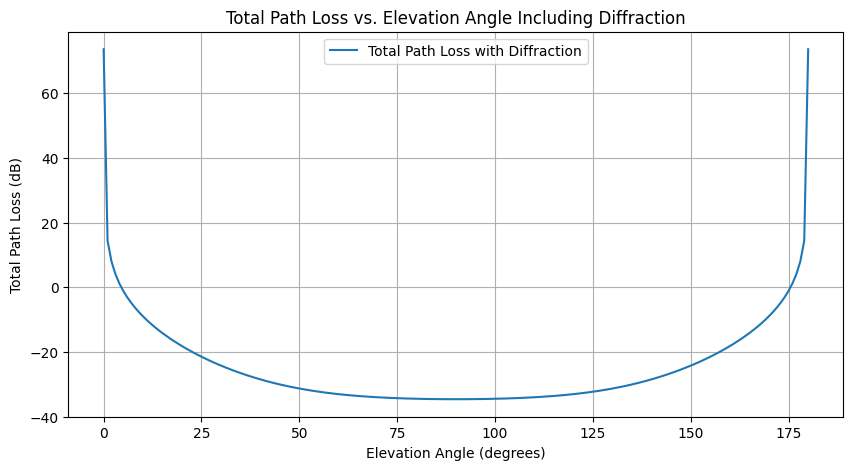

In [145]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Constants
c = 3e8  # Speed of light in m/s
frequency = 26e9  # Frequency in Hz
lambda_wave = c / frequency  /10e3 # Wavelength in meters
print(f"Wavelength: {lambda_wave} m")
R_e = 6371  # Earth radius in meters
satellite_altitude = 500  # Satellite altitude in meters
wall_height = 0.01  # Wall height in meters

def satellite_position(elevation_angle_degrees, observer_position=(0, R_e)):
    """Calculate satellite position using elevation angle and observer position."""
    earth_radius = observer_position[1]
    elevation_angle_radians = np.radians(elevation_angle_degrees)
    
    # Distance from the observer to the satellite along the line of sight
    d = np.sqrt((earth_radius + satellite_altitude)**2 - (earth_radius * np.cos(elevation_angle_radians))**2)
    d -= earth_radius * np.sin(elevation_angle_radians)
    
    # x is the horizontal distance from the observer
    x = d * np.cos(elevation_angle_radians)
    # y is the height of the satellite above the ground
    y = satellite_altitude * np.sin(elevation_angle_radians)
    return x, y

def distance_between_points(x1, y1, x2, y2):
    """Calculate Euclidean distance between two points."""
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

def calculate_h(x_sat, y_sat):
    """Calculate the effective height of the satellite above the wall height."""
    x_wall, y_wall = 0, wall_height  # Wall position
    # Calculate the height of the satellite above the wall
    h = y_sat - wall_height
    return h

def calculate_distances_d1_d2(elevation_angle):
    """Calculate distances d1 and d2 based on the elevation angle."""
    x_sat, y_sat = satellite_position(elevation_angle)
    wall_x = 0  # Knife-edge at origin (x = 0)
    wall_y = wall_height  # Height of knife-edge
    d1 = distance_between_points(x_sat, y_sat, wall_x, wall_y)
    d2 = distance_between_points(wall_x, wall_y, wall_x, 0)  # Wall to observer (at ground level)
    return d1, d2

def calculate_nu(elevation_angle):
    """Calculate the parameter nu for the knife-edge diffraction model."""
    x_sat, y_sat = satellite_position(elevation_angle)
    h = calculate_h(x_sat, y_sat)
    d1, d2 = calculate_distances_d1_d2(elevation_angle)
    
    # Debugging print statements
    print(f"Elevation angle: {elevation_angle} degrees")
    print(f"Satellite position: x = {x_sat}, y = {y_sat}")
    print(f"Height h: {h}")
    print(f"Distance d1: {d1}")
    print(f"Distance d2: {d2}")
    
    nu = np.abs(h) * np.sqrt(2 / lambda_wave * (1 / d1 + 1 / d2))
    #nu = nu % (2 * np.pi)  # Applying modulo operation to keep nu within 0 to 2*pi
    print(f"Nu (mod 2*pi): {nu}")
    return nu

def knife_edge_diffraction_loss(nu):
    """Calculate the knife-edge diffraction loss using the approximation."""
    if nu == np.inf:
        return 0
    elif nu == 0:
        return 0
    elif nu < 0:
        nu = abs(nu)
    F_nu_magnitude_squared = 1 / (2 * np.pi**2 * nu**2)
    L_ke = 10 * np.log10(F_nu_magnitude_squared)
    return L_ke

def free_space_path_loss(d):
    """Calculate free-space path loss."""
    return 20 * np.log10(d) + 20 * np.log10(frequency) + 20 * np.log10(4 * np.pi / c)

# Example usage for multiple elevation angles
elevation_angles = np.linspace(0, 180, 180)  # Reduced number of points for debugging
nu_values = [calculate_nu(angle) for angle in elevation_angles]
diffraction_losses = [knife_edge_diffraction_loss(nu) for nu in nu_values]
free_space_losses = [free_space_path_loss(distance_between_points(0, 0, *satellite_position(angle))) for angle in elevation_angles]
total_losses = [fs - dl for fs, dl in zip(free_space_losses, diffraction_losses)]

plt.figure(figsize=(10, 5))
plt.plot(elevation_angles, nu_values, label='Nu values')
plt.xlabel('Elevation Angle (degrees)')
plt.ylabel('Nu')
plt.title('Nu vs. Elevation Angle')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(elevation_angles, diffraction_losses, label='Knife-Edge Diffraction Loss')
plt.xlabel('Elevation Angle (degrees)')
plt.ylabel('Diffraction Loss (L_ke) (dB)')
plt.title('Diffraction Loss vs. Elevation Angle')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(elevation_angles, total_losses, label='Total Path Loss with Diffraction')
plt.xlabel('Elevation Angle (degrees)')
plt.ylabel('Total Path Loss (dB)')
plt.title('Total Path Loss vs. Elevation Angle Including Diffraction')
plt.legend()
plt.grid(True)
plt.show()


now we will consider the free space path loss between satellite-wall + wall-rx (tho ig we can ignore it) + loss due to diffraction L_{ke}

Wavelength: 0.011538461538461539 m
Elevation angle: 0.0 degrees
Satellite position: x = 2573130.389234094, y = 0.0
Height h: -10.0
Distance d1: 2573130.3892535255
Distance d2: 10.0
Nu (mod 2*pi): 3.934289046303121
Elevation angle: 9.473684210526315 degrees
Satellite position: x = 1706375.3808108403, y = 82297.29514036694
Height h: 82287.29514036694
Distance d1: 1708358.3169753524
Distance d2: 10.0
Nu (mod 2*pi): 5.935959157285737
Elevation angle: 18.94736842105263 degrees
Satellite position: x = 1166105.9520920992, y = 162349.73460234172
Height h: 162339.73460234172
Distance d1: 1177351.8084818064
Distance d2: 10.0
Nu (mod 2*pi): 1.1217694319781017
Elevation angle: 28.421052631578945 degrees
Satellite position: x = 830771.2132282755, y = 237973.69651853674
Height h: 237963.69651853674
Distance d1: 864180.2645221349
Distance d2: 10.0
Nu (mod 2*pi): 1.2283806940100916
Elevation angle: 37.89473684210526 degrees
Satellite position: x = 607794.0778613652, y = 307106.3563448339
Height h: 307

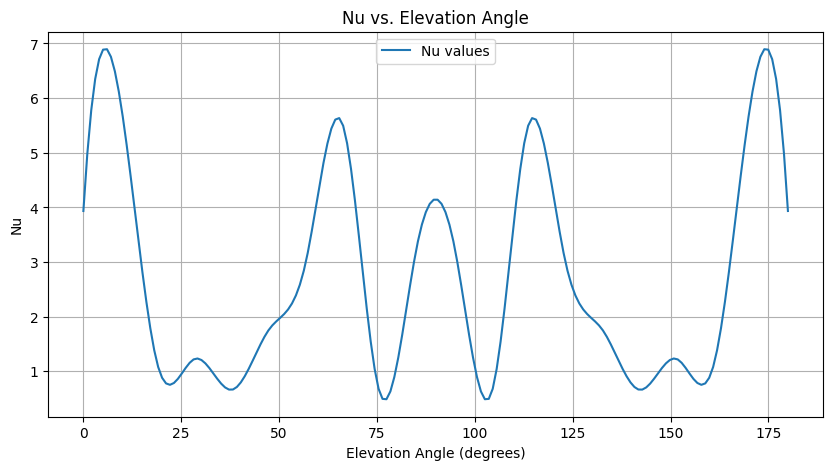

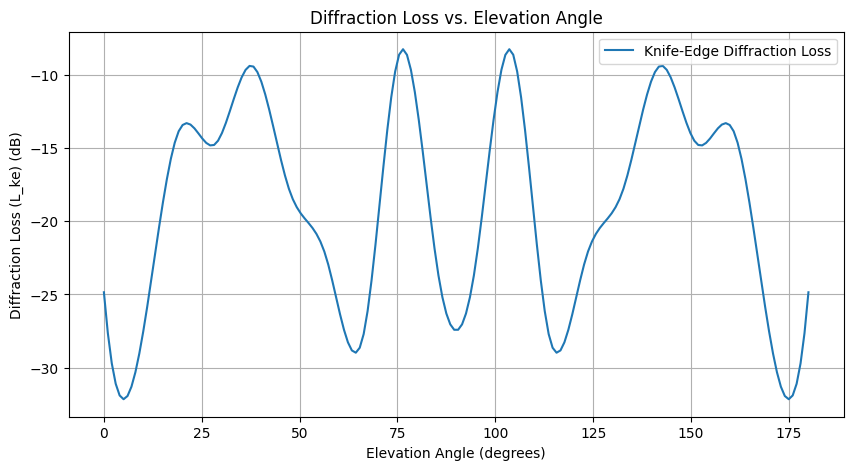

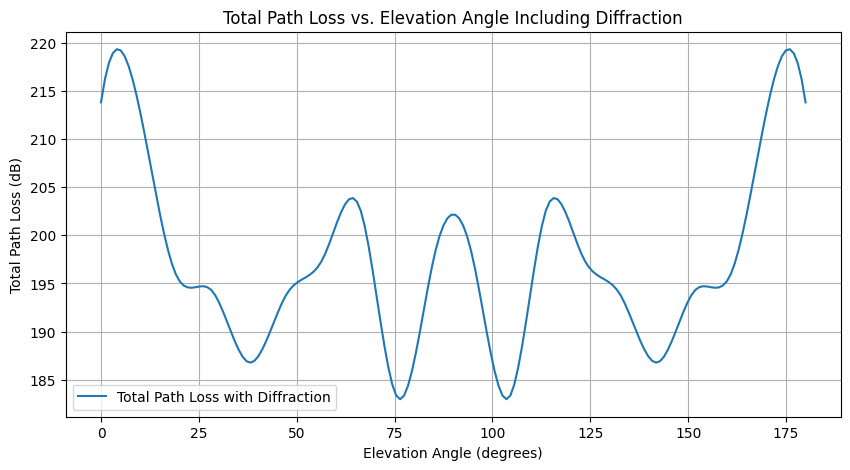

In [154]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Constants
c = 3e8  # Speed of light in m/s
frequency = 26e9  # Frequency in Hz
lambda_wave = c / frequency  # Wavelength in meters
print(f"Wavelength: {lambda_wave} m")
R_e = 6371e3  # Earth radius in meters
satellite_altitude = 500e3  # Satellite altitude in meters
wall_height = 10  # Wall height in meters

def satellite_position(elevation_angle_degrees, observer_position=(0, R_e)):
    """Calculate satellite position using elevation angle and observer position."""
    earth_radius = observer_position[1]
    elevation_angle_radians = np.radians(elevation_angle_degrees)
    
    # Distance from the observer to the satellite along the line of sight
    d = np.sqrt((earth_radius + satellite_altitude)**2 - (earth_radius * np.cos(elevation_angle_radians))**2)
    d -= earth_radius * np.sin(elevation_angle_radians)
    
    # x is the horizontal distance from the observer
    x = d * np.cos(elevation_angle_radians)
    # y is the height of the satellite above the ground
    y = satellite_altitude * np.sin(elevation_angle_radians)
    return x, y

def distance_between_points(x1, y1, x2, y2):
    """Calculate Euclidean distance between two points."""
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

def calculate_h(x_sat, y_sat):
    """Calculate the effective height of the satellite above the wall height."""
    x_wall, y_wall = 0, wall_height  # Wall position
    # Calculate the height of the satellite above the wall
    h = y_sat - wall_height
    return h

def calculate_distances_d1_d2(elevation_angle):
    """Calculate distances d1 and d2 based on the elevation angle."""
    x_sat, y_sat = satellite_position(elevation_angle)
    wall_x = 0  # Knife-edge at origin (x = 0)
    wall_y = wall_height  # Height of knife-edge
    d1 = distance_between_points(x_sat, y_sat, wall_x, wall_y)
    d2 = distance_between_points(wall_x, wall_y, wall_x, 0)  # Wall to observer (at ground level)
    return d1, d2

def calculate_nu(elevation_angle):
    """Calculate the parameter nu for the knife-edge diffraction model."""
    x_sat, y_sat = satellite_position(elevation_angle)
    h = calculate_h(x_sat, y_sat)
    d1, d2 = calculate_distances_d1_d2(elevation_angle)
    
    # Debugging print statements
    print(f"Elevation angle: {elevation_angle} degrees")
    print(f"Satellite position: x = {x_sat}, y = {y_sat}")
    print(f"Height h: {h}")
    print(f"Distance d1: {d1}")
    print(f"Distance d2: {d2}")
    
    nu = np.abs(h) * np.sqrt(2 / lambda_wave * (1 / d1 + 1 / d2))
    nu = nu % (2 * np.pi)  # Applying modulo operation to keep nu within 0 to 2*pi
    print(f"Nu (mod 2*pi): {nu}")
    return nu

def knife_edge_diffraction_loss(nu):
    """Calculate the knife-edge diffraction loss using the approximation."""
    if nu == np.inf:
        return 0
    elif nu == 0:
        return 0
    elif nu < 0:
        nu = abs(nu)
    F_nu_magnitude_squared = 1 / (2 * np.pi**2 * nu**2)
    L_ke = 10 * np.log10(F_nu_magnitude_squared)
    return L_ke

def free_space_path_loss(d):
    """Calculate free-space path loss."""
    return 20 * np.log10(d) + 20 * np.log10(frequency) + 20 * np.log10(4 * np.pi / c)

# Calculate values for a smaller number of points and interpolate for smoothing
elevation_angles_few = np.linspace(0, 180, 20)
nu_values_few = [calculate_nu(angle) for angle in elevation_angles_few]
diffraction_losses_few = [knife_edge_diffraction_loss(nu) for nu in nu_values_few]
free_space_losses_few = [free_space_path_loss(distance_between_points(0, 0, *satellite_position(angle))) for angle in elevation_angles_few]

# Interpolate to get a smoother curve
elevation_angles_smooth = np.linspace(0, 180, 180)
nu_interpolator = interp1d(elevation_angles_few, nu_values_few, kind='cubic')
loss_interpolator = interp1d(elevation_angles_few, diffraction_losses_few, kind='cubic')
fs_loss_interpolator = interp1d(elevation_angles_few, free_space_losses_few, kind='cubic')

nu_values_smooth = nu_interpolator(elevation_angles_smooth)
diffraction_losses_smooth = loss_interpolator(elevation_angles_smooth)
free_space_losses_smooth = fs_loss_interpolator(elevation_angles_smooth)

# Calculate total path loss with diffraction
total_diffracted_losses_smooth = [fs - dl for fs, dl in zip(free_space_losses_smooth, diffraction_losses_smooth)]

# Plot the smoothed values
plt.figure(figsize=(10, 5))
plt.plot(elevation_angles_smooth, nu_values_smooth, label='Nu values')
plt.xlabel('Elevation Angle (degrees)')
plt.ylabel('Nu')
plt.title('Nu vs. Elevation Angle')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(elevation_angles_smooth, diffraction_losses_smooth, label='Knife-Edge Diffraction Loss')
plt.xlabel('Elevation Angle (degrees)')
plt.ylabel('Diffraction Loss (L_ke) (dB)')
plt.title('Diffraction Loss vs. Elevation Angle')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(elevation_angles_smooth, total_diffracted_losses_smooth, label='Total Path Loss with Diffraction')
plt.xlabel('Elevation Angle (degrees)')
plt.ylabel('Total Path Loss (dB)')
plt.title('Total Path Loss vs. Elevation Angle Including Diffraction')
plt.legend()
plt.grid(True)
plt.show()


In [125]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Constants
c = 3e8  # Speed of light in m/s
frequency = 26e9  # Frequency in Hz for example, assuming 26 GHz
earth_radius = 6371  # Earth radius in km
satellite_altitude = 500  # Satellite altitude in km above Earth's surface
wall_height = 0.01  # Wall height in km above Earth's surface

def satellite_position(elevation_angle_degrees):
    """ Calculate satellite's position based on the elevation angle. """
    elevation_angle_radians = math.radians(elevation_angle_degrees)
    d = math.sqrt((earth_radius + satellite_altitude)**2 - (earth_radius * math.cos(elevation_angle_radians))**2)
    d -= earth_radius * math.sin(elevation_angle_radians)
    
    x = d * math.cos(elevation_angle_radians)
    y = earth_radius + satellite_altitude  # altitude from the center of the Earth
    return x, y

def free_space_path_loss(d, f=frequency):
    """ Calculate free space path loss for a given distance. """
    d_meters = d * 1e3  # Convert distance from km to meters
    wavelength = c / f
    path_loss = 20 * np.log10((4 * np.pi * d_meters / wavelength))
    return path_loss

def calculate_path_loss_to_wall(elevation_angle):
    """ Calculate the path loss from satellite to the nearest wall. """
    x, y = satellite_position(elevation_angle)
    wall_x = 0.01 if x > 0.01 else -0.01
    wall_y = earth_radius + wall_height

    # Calculate distance from satellite to the top of the nearest wall
    distance = math.sqrt((x - wall_x)**2 + (y - wall_y)**2)

    # Calculate path loss
    return free_space_path_loss(distance)

def plot_path_loss_vs_elevation(angles):
    """ Plot the path loss from the satellite to the nearest wall for different elevation angles. """
    path_losses = [calculate_path_loss_to_wall(angle) for angle in angles]

    plt.figure(figsize=(10, 5))
    plt.plot(angles, path_losses, marker='o', linestyle='-', color='b', label='Path Loss vs. Elevation Angle')
    plt.xlabel('Elevation Angle (degrees)')
    plt.ylabel('Path Loss (dB)')
    plt.title('Free Space Path Loss from Satellite to Wall vs. Elevation Angle')
    plt.grid(True)
    plt.legend()
    plt.show()
    #return path_losses

# Generate a range of elevation angles from 0 to 180 degrees
angles = np.linspace(0, 180, 180)
#path_losses_to_wall=plot_path_loss_vs_elevation(angles)


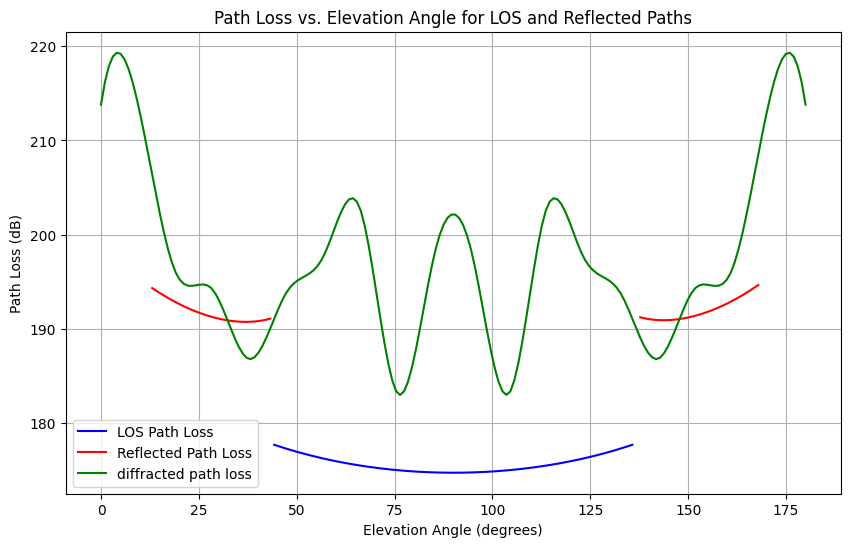

In [148]:
plt.figure(figsize=(10, 6))
plt.plot(angles, path_losses_LOS, label='LOS Path Loss', color='blue')
plt.plot(angles, reflected_losses, label='Reflected Path Loss', color='red')
plt.plot(angles, total_diffracted_losses_smooth,label='diffracted path loss', color='green')
plt.xlabel('Elevation Angle (degrees)')
plt.ylabel('Path Loss (dB)')
plt.title('Path Loss vs. Elevation Angle for LOS and Reflected Paths')
plt.legend()
plt.grid(True)
plt.show()

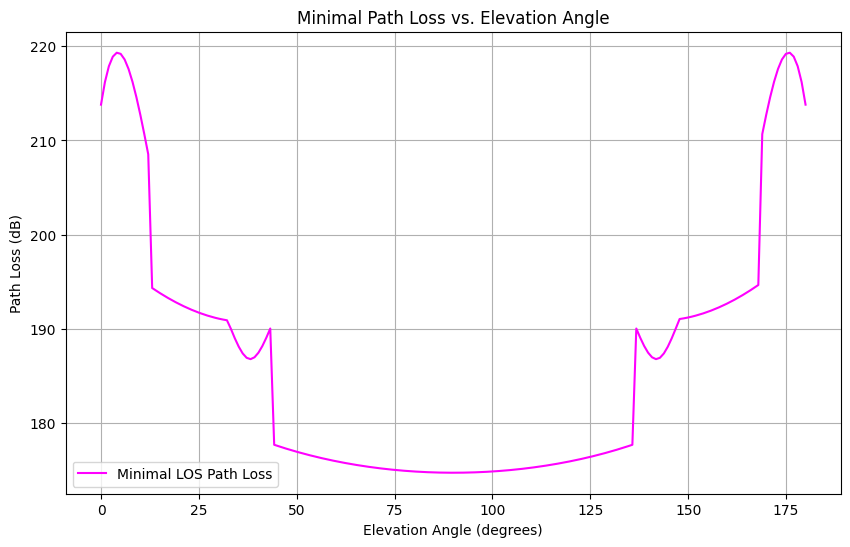

In [149]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize angles and the corresponding path loss arrays


# Handle -inf, inf, and nan by replacing them with nan
path_losses_LOS = np.where(np.isinf(path_losses_LOS), np.nan, path_losses_LOS)
reflected_losses = np.where(np.isinf(reflected_losses), np.nan, reflected_losses)
diffracted_pathloss = np.where(np.isinf(total_diffracted_losses_smooth), np.nan, total_diffracted_losses_smooth)

# Compute minimal LOS path loss while ignoring nan
minimal_LOS = []
for i in range(len(angles)):
    min_val = np.nanmin([path_losses_LOS[i], reflected_losses[i], diffracted_pathloss[i]])
    if np.isnan(min_val):  # If all are nan, handle it by setting a default value, e.g., a high loss
        min_val = 300  # You can adjust this default value based on your context
    minimal_LOS.append(min_val)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(angles, minimal_LOS, label='Minimal LOS Path Loss', color='magenta')
plt.xlabel('Elevation Angle (degrees)')
plt.ylabel('Path Loss (dB)')
plt.title('Minimal Path Loss vs. Elevation Angle')
plt.legend()
plt.grid(True)
plt.show()


now we recalculate the values in part1 (received power, SNR, channel capacity, total tranmsitted info)

180
[ -58.68226649  -62.53328941  -66.37347187  -70.20780645  -74.03070462
  -77.84785263  -81.65337626  -85.45325381  -89.24111633  -93.02344213
  -96.79351458 -100.55816388 -104.31041818 -108.05736615 -111.79179263
 -115.52103193 -115.27557482 -115.0313239  -114.78125324 -114.5325
 -114.2786106  -114.02613653 -113.76925817 -113.5138796  -113.25475671
 -112.99720474 -112.7364898  -112.477404   -112.21575088 -111.9557728
 -111.69397939 -111.43389538 -111.17250241 -110.91284258 -110.65263965
 -110.39418395 -110.13549896 -109.87856663 -109.62214381 -109.36747149
 -109.11361945 -108.86150913 -108.61073942 -108.36169698 -108.11422681
 -107.86846471 -107.62487959 -107.38297937 -107.14337136 -106.9054219
 -106.67013111 -106.43646999 -106.20574118 -105.97661122 -105.75044839
 -105.52585217 -105.30450125 -105.0846837  -104.8683758  -104.65356744
 -104.44223852 -104.23237504 -104.02599535 -103.82104698 -103.61970644
 -103.41976332 -103.22358545 -103.02877152 -102.83764795 -102.64785539
 -102.46

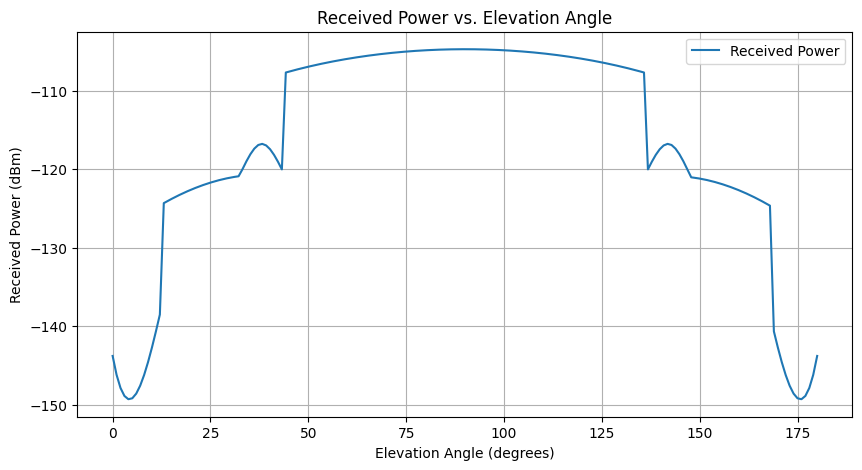

180


In [150]:
print(len(minimal_LOS))
# Given EIRP
EIRP_dBW = 40  

def dBW_to_Watts(dBW):
    return 10**(dBW / 10)


def received_power_dBm(EIRP_dBW, path_loss_dB):
    # convert EIRP from dBW to dBm (1 W = 30 dBm)
    EIRP_dBm = EIRP_dBW + 30
    # subtract the path loss to get the received power
    P_rx_dBm = EIRP_dBm - path_loss_dB
    return P_rx_dBm

# calculate received power in dBm for each path loss value
P3received_powers_dBm = [received_power_dBm(EIRP_dBW, pl) for pl in minimal_LOS]
print(received_powers_dBm)

plt.figure(figsize=(10, 5))
plt.plot(angles, P3received_powers_dBm, label='Received Power')
plt.xlabel('Elevation Angle (degrees)')
plt.ylabel('Received Power (dBm)')
plt.title('Received Power vs. Elevation Angle')
plt.grid(True)
plt.legend()
plt.show()

print(len(P3received_powers_dBm))


SNR

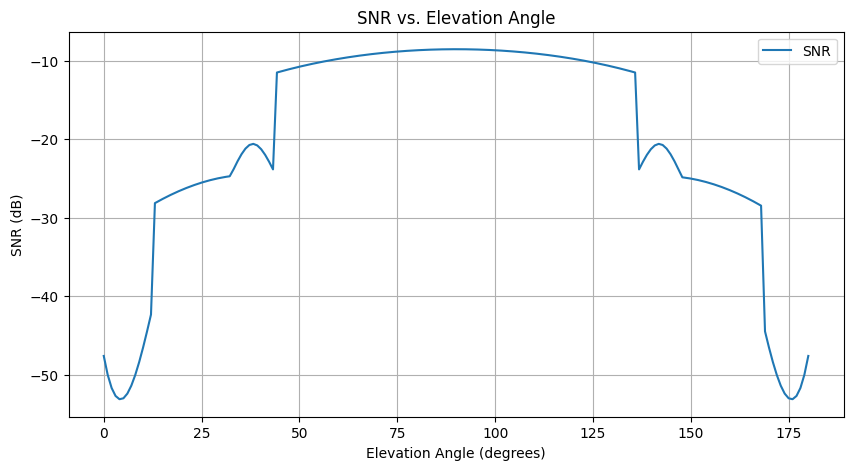

In [151]:
k_B = Boltzmann  # J/K
system_temperature_K = 275  # system temperature in Kelvin (assumed to be 275K as given)
bandwidth_Hz = 40e6  # 40 MHz
noise_figure_dB = 2  # noise figure in dB (given) ???
noise_figure_linear = 10 ** (noise_figure_dB / 10)

def thermal_noise(T, B):
    return k_B * T * B

thermal_noise_power = thermal_noise(system_temperature_K, bandwidth_Hz)
total_noise_power = thermal_noise_power * noise_figure_linear

def dBm_to_Watts(dBm):
    return 10 ** ((dBm - 30) / 10)

def calculate_SNR_dB(received_power_dBm, total_noise_power_W):
    P_RX_W = dBm_to_Watts(received_power_dBm)
    SNR_linear = P_RX_W / total_noise_power_W
    SNR_dB = 10 * np.log10(SNR_linear)
    return SNR_dB

P3SNRs_dB = [calculate_SNR_dB(P_rx, total_noise_power) for P_rx in P3received_powers_dBm]


plt.figure(figsize=(10, 5))
plt.plot(angles, P3SNRs_dB, label='SNR')
plt.xlabel('Elevation Angle (degrees)')
plt.ylabel('SNR (dB)')
plt.title('SNR vs. Elevation Angle')
plt.grid(True)
plt.legend()
plt.show()

TypeError: unhashable type: 'dict'

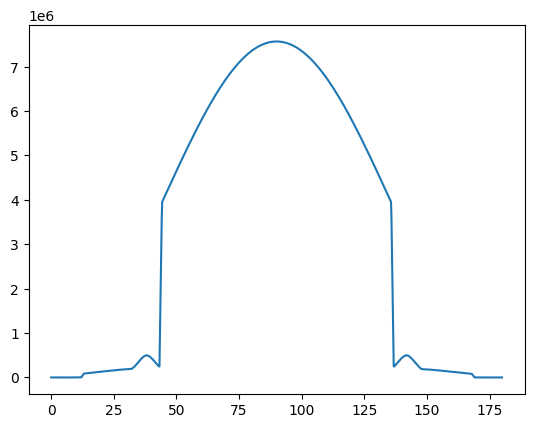

In [152]:
def snr_db_to_linear(snr_db):
    snr_db = np.array(snr_db)
    return 10 ** (snr_db / 10)

# given array of SNRs in dB for elevation angles from 0 to 180 degrees

P3SNRs_linear = snr_db_to_linear(P3SNRs_dB)
P3channel_capacities = B * np.log2(1 + P3SNRs_linear)


elevation_angles_high_res = np.linspace(0, 180, 1000) 
P3channel_capacities_interp = np.interp(elevation_angles_high_res, angles, P3channel_capacities)
plt.plot(elevation_angles_high_res, P3channel_capacities_interp)
plt.plot(elevation_angles_high_res,channel_capacities)
print(len(elevation_angles))
print(len(P3channel_capacities_interp))

In [141]:
P3total_transmitted_data = np.sum(
    (P3channel_capacities_interp[:-1] + P3channel_capacities_interp[1:]) / 2 * delta_tn
)

# Output the total transmitted data
print(P3total_transmitted_data/(8*1024*1024), "MB")

ValueError: operands could not be broadcast together with shapes (999,) (359,) 